## Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/"

In [3]:
file_name1 = dir_origen_csv + "Data_limpia_windows.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df.head()

medidor                fecha  lectura_id_orig  voltajeA  voltajeB  \
0  15029828  2019-04-04 01:00:58          1141410  117.4806  117.7270   
1  15029828  2019-04-04 03:00:58          1141840  117.3321  117.5873   
2  15029828  2019-04-04 05:00:58          1142271  118.3265  118.3270   
3  15029828  2019-04-04 07:01:01          1142711  119.8214  119.9720   
4  15029828  2019-04-04 09:01:02          1143130  114.6726  114.8017   

   voltajeC  corrienteA  corrienteB  corrienteC modelo  ...  Longitud  \
0  117.3373      2.5937      0.4362      1.2456     A3  ...  -79.4001   
1  117.6078      2.5860      0.4373      1.2439     A3  ...  -79.4001   
2  118.5901      2.6232      0.4349      1.2502     A3  ...  -79.4001   
3  119.6614      2.6989      0.4356      1.2671     A3  ...  -79.4001   
4  115.2943      2.0728      0.8169      0.9463     A3  ...  -79.4001   

   CLASIFICACION  kwh_consumido  kvarh_consumido  tipo_consumo  \
0       PILADORA        23.2575              0.0         medio   
1       PILADORA        22.6800              0.0         medio   
2       PILADORA        23.5200              0.0         medio   
3       PILADORA        20.2125              0.0         medio   
4       PILADORA        26.4075              0.0         medio   

   clasificacion_encoded  modelo_encoded  tipo_consumo_encoded   kwh_hora  \
0                      3               0                     0  11.628750   
1                      3               0                     0  11.340000   
2                      3               0                     0  11.760000   
3                      3               0                     0  10.102041   
4                      3               0                     0  13.201916   

   dayMonth  
0        14  
1        14  
2        14  
3        14  
4        14  

[5 rows x 35 columns]

In [8]:
df["fecha"] =  pd.to_datetime(df["fecha"])

In [4]:
df["medidor"].value_counts()

58706656    2947
52073163    1392
15029977     736
15029846     726
20037228     722
58706706     721
15029835     719
15842894     718
16951216     716
16951175     715
16951221     714
16567743     713
16951176     713
16951203     712
15842885     711
16951181     711
16567753     710
16951209     710
15029844     710
16951220     708
16951205     706
16951201     703
16567760     701
20037214     701
15029847     701
16567746     700
16951206     699
16567761     699
16951222     698
16951177     697
            ... 
53307830     360
59814806     360
52071420     360
58706663     359
35924882     358
52073359     357
52071428     356
52073331     356
35924864     356
58706634     355
41175730     355
52073348     348
35947180     346
28006904     346
53307871     344
52071447     342
52073201     341
58706740     339
58706704     333
52073382     332
35924866     331
35925291     331
52073290     327
58706662     315
52073198     312
58706713     286
52071455     275
58706709     2

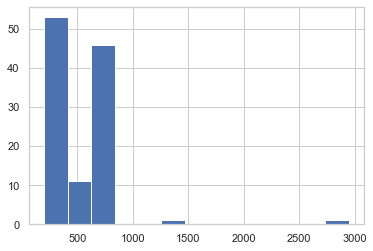

In [5]:
df["medidor"].value_counts().hist(bins = 13)

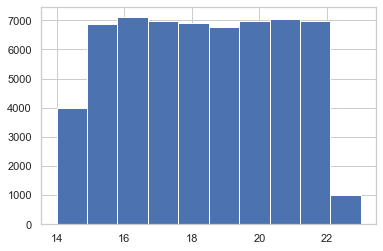

In [6]:
df["dayMonth"].hist()

In [7]:
df["medidor"].nunique()

112

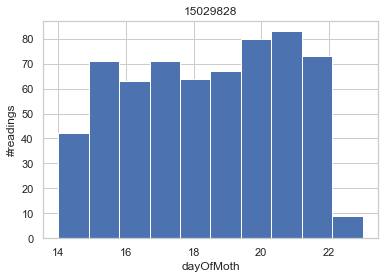

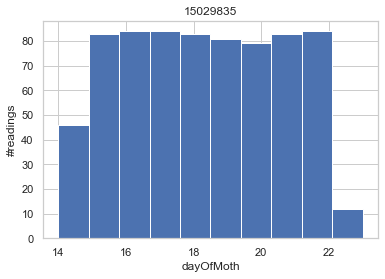

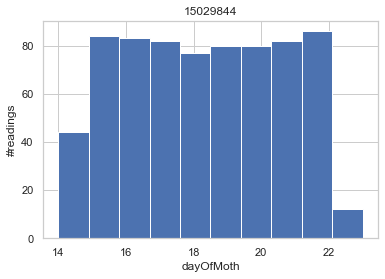

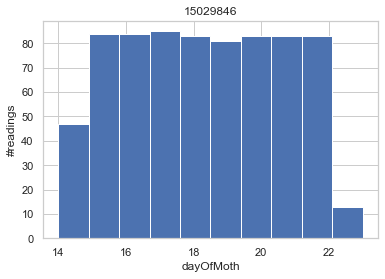

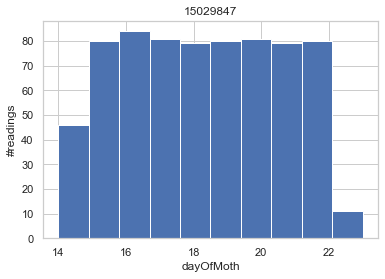

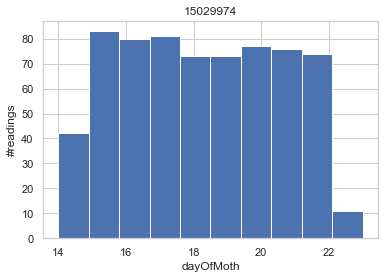

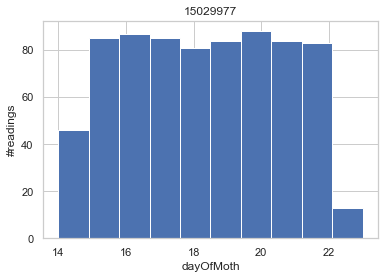

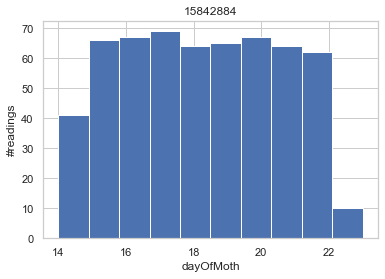

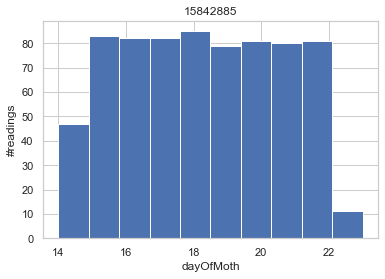

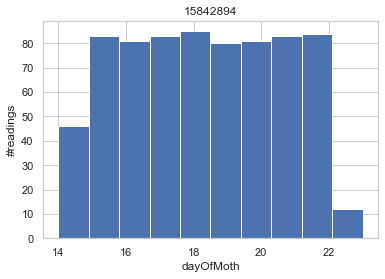

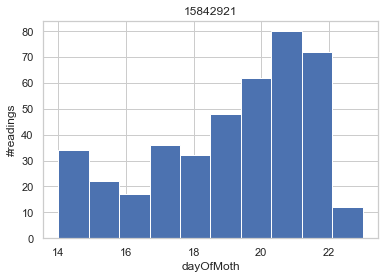

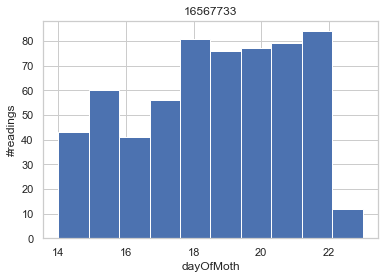

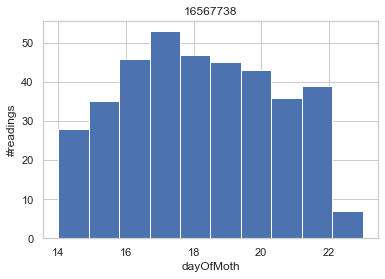

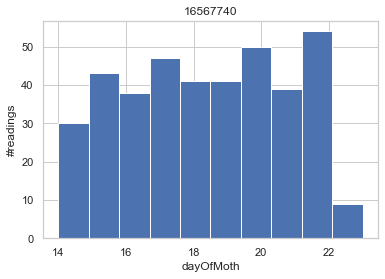

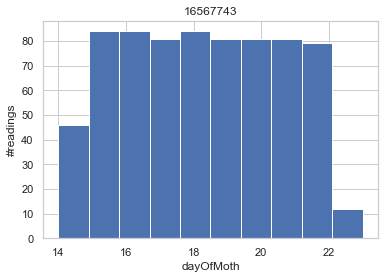

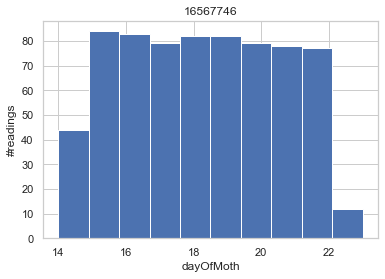

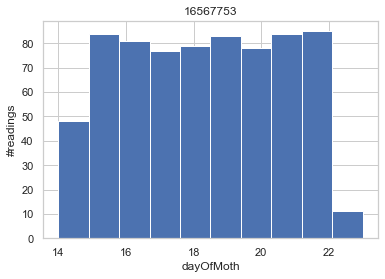

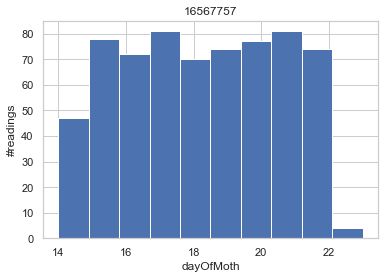

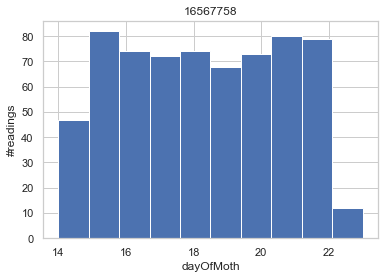

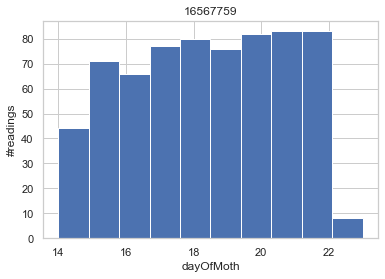

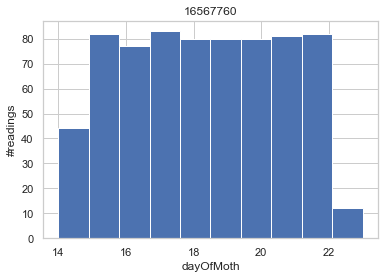

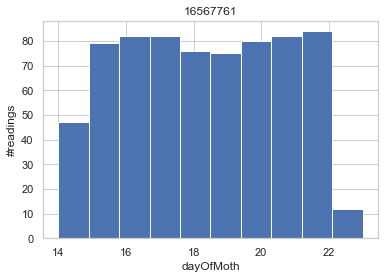

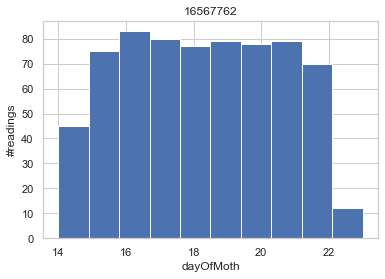

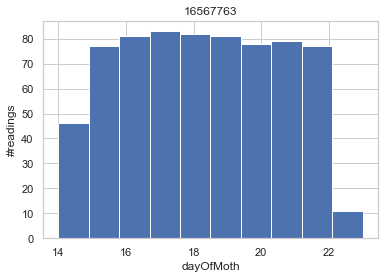

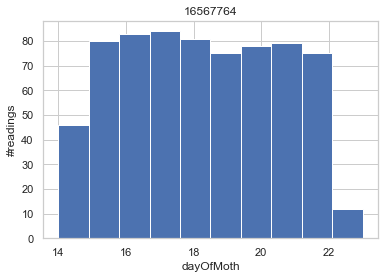

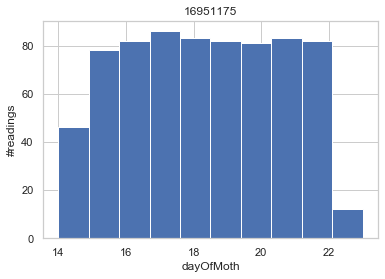

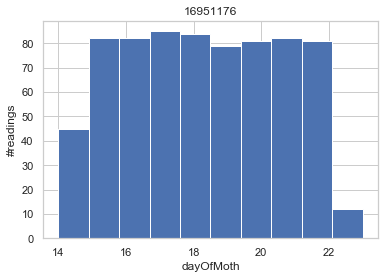

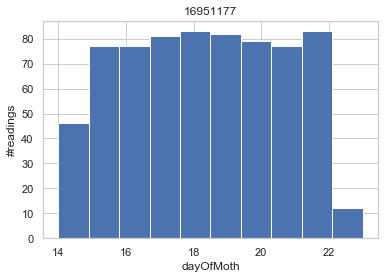

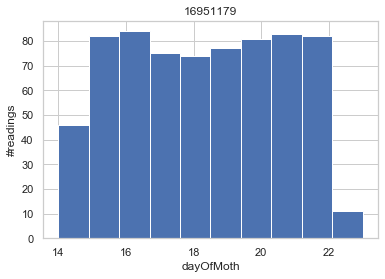

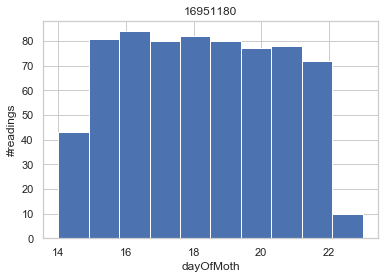

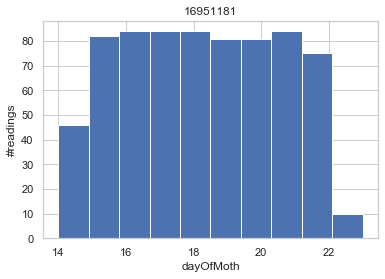

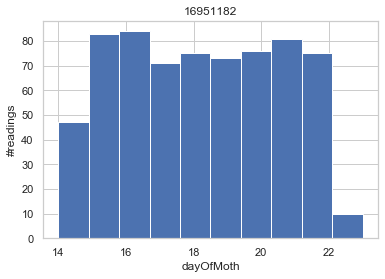

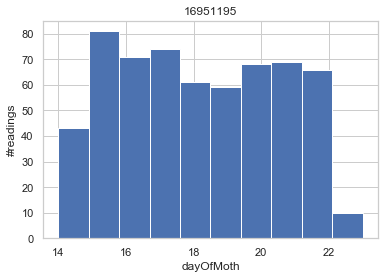

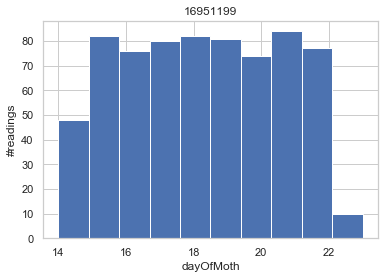

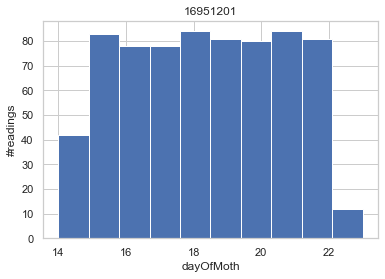

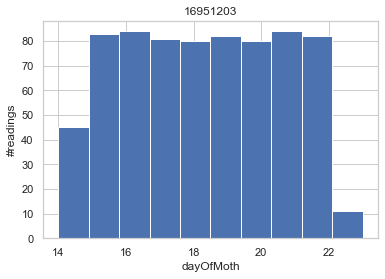

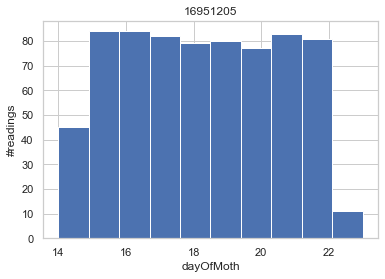

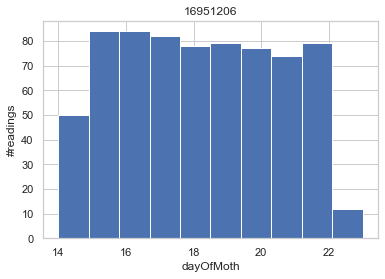

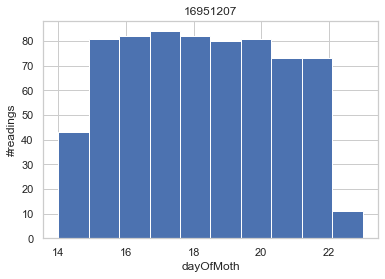

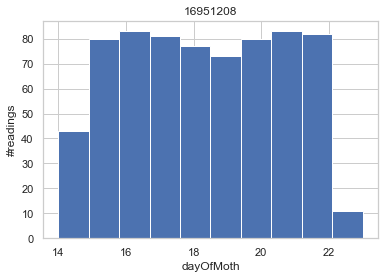

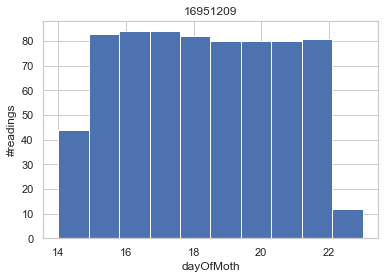

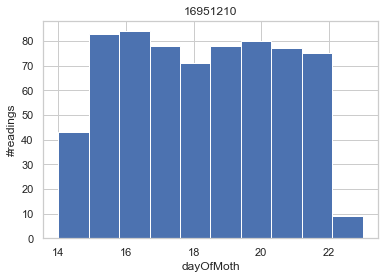

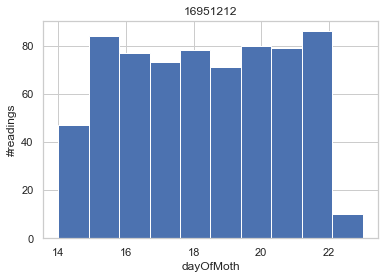

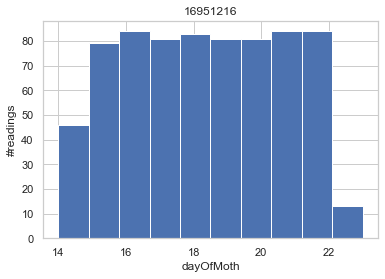

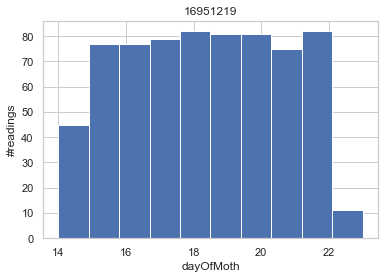

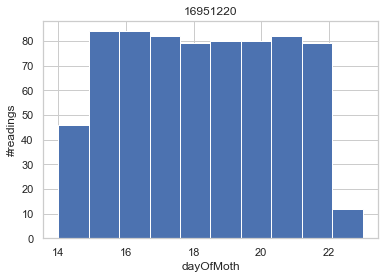

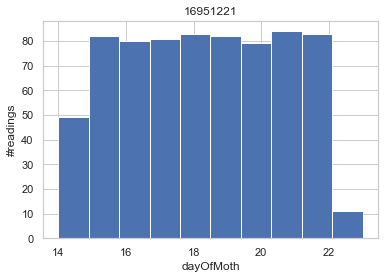

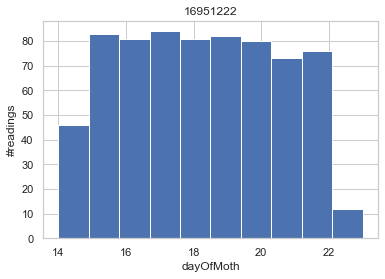

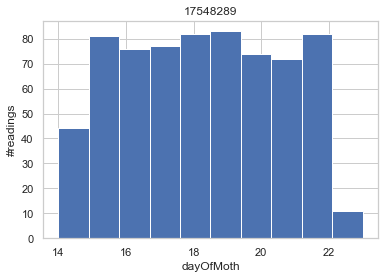

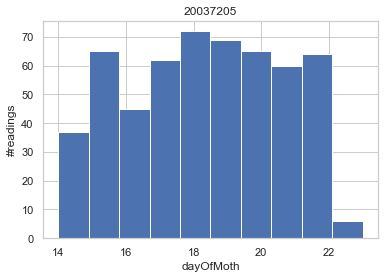

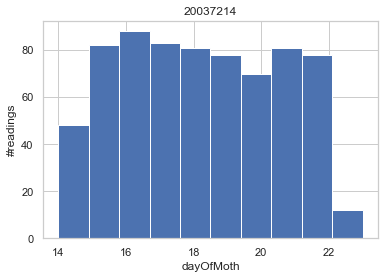

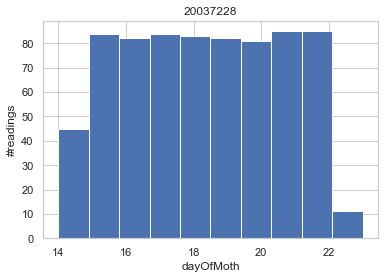

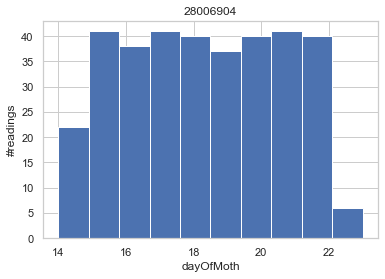

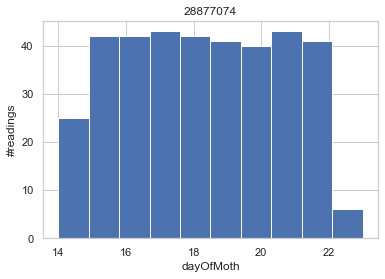

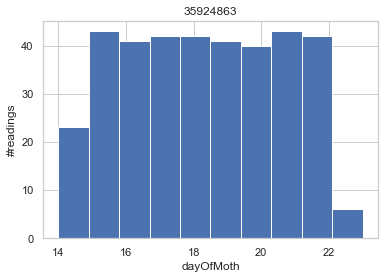

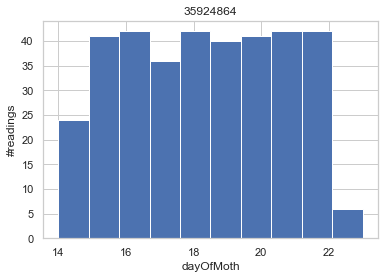

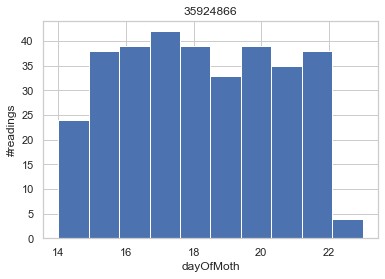

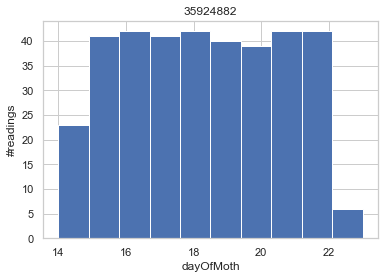

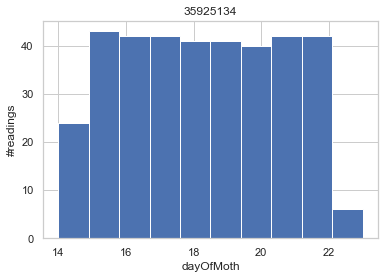

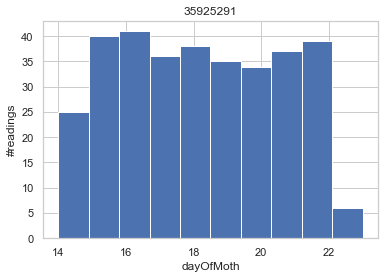

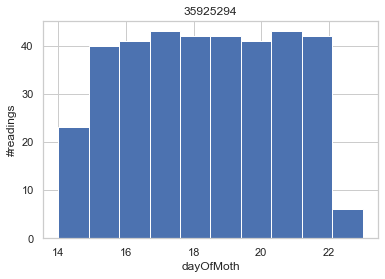

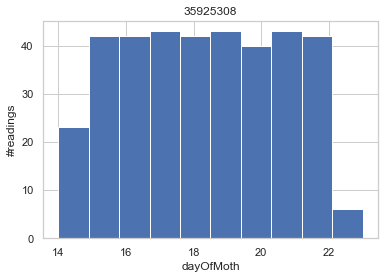

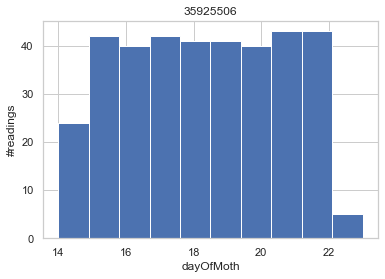

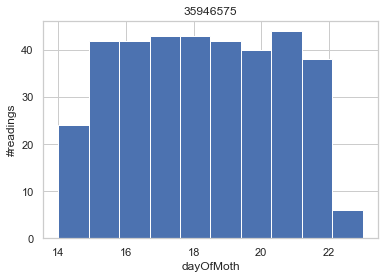

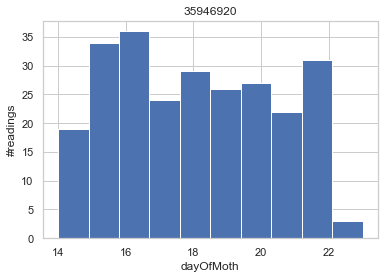

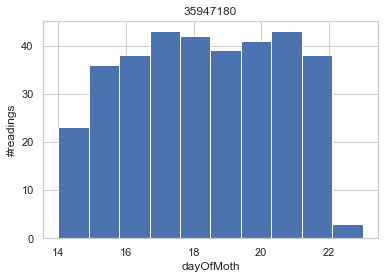

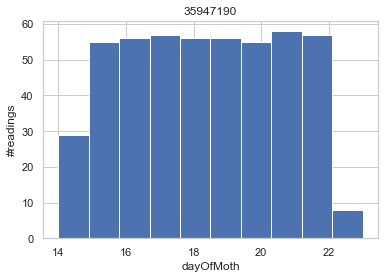

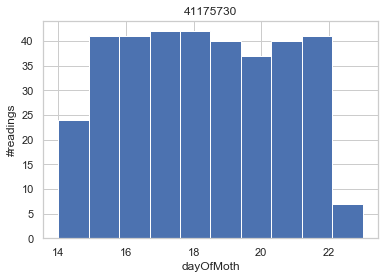

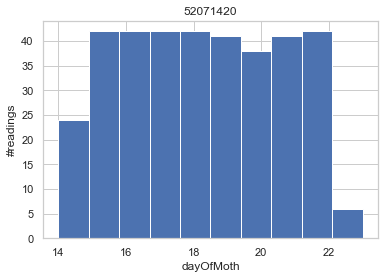

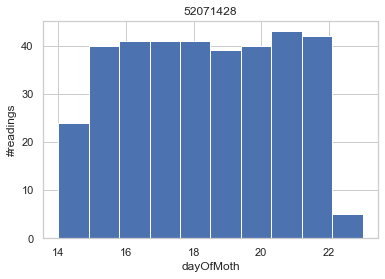

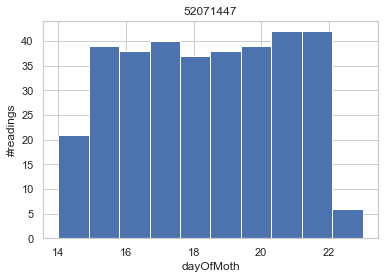

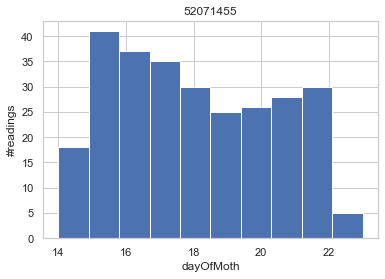

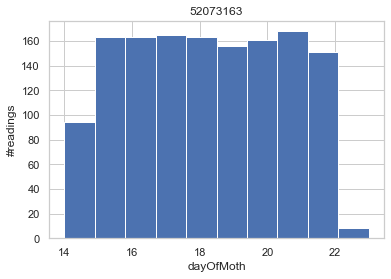

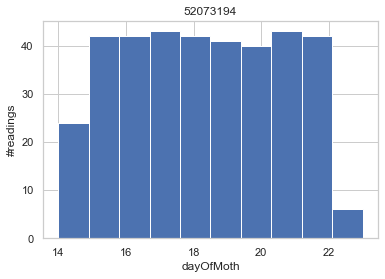

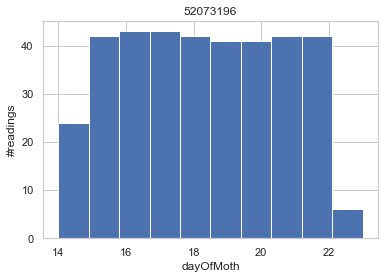

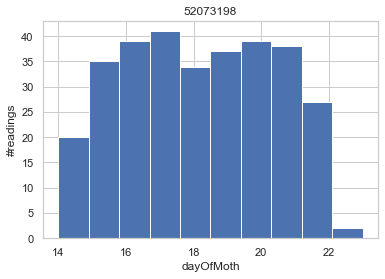

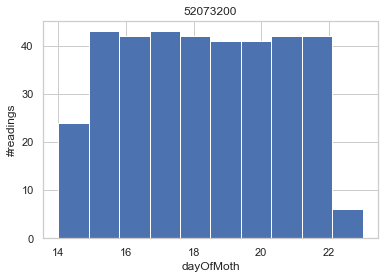

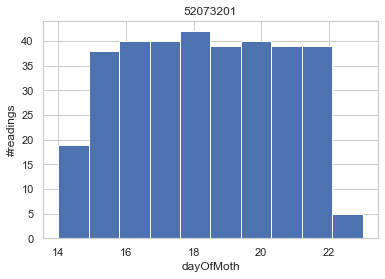

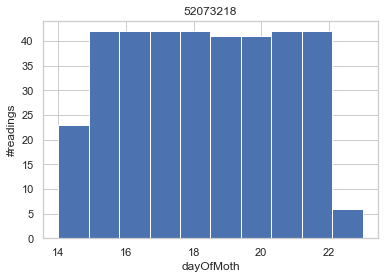

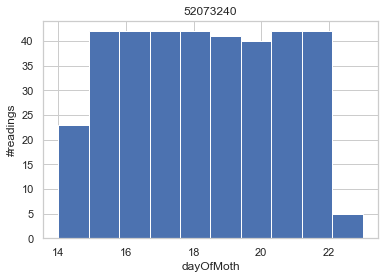

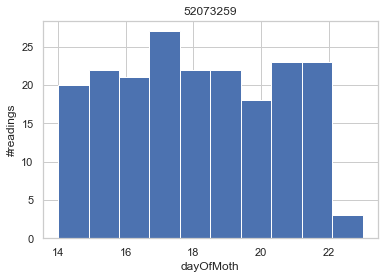

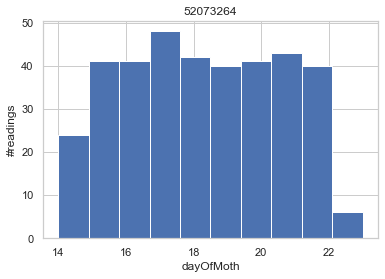

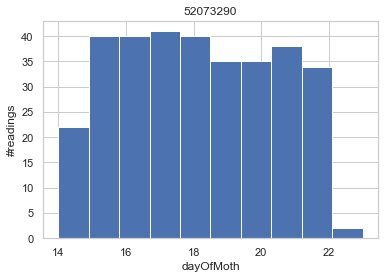

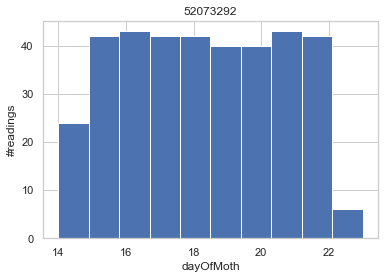

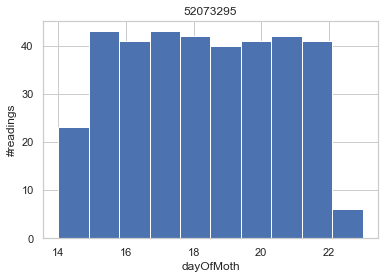

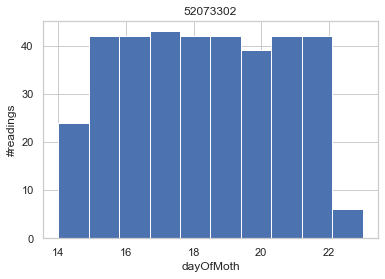

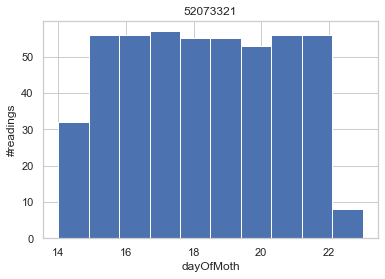

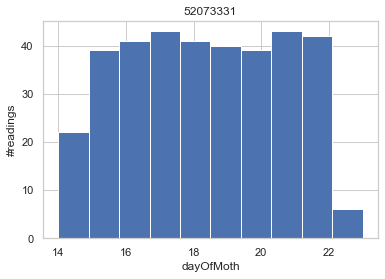

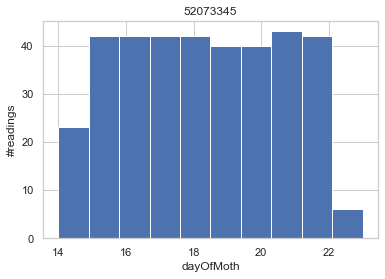

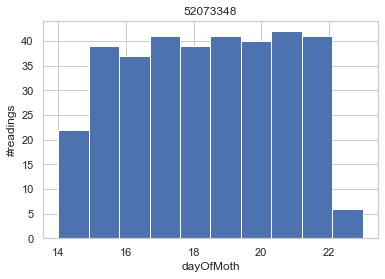

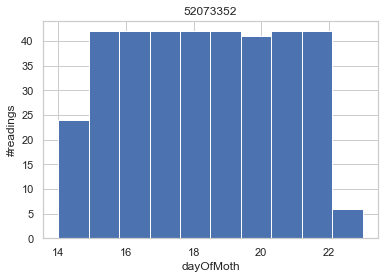

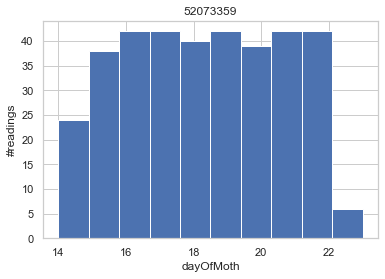

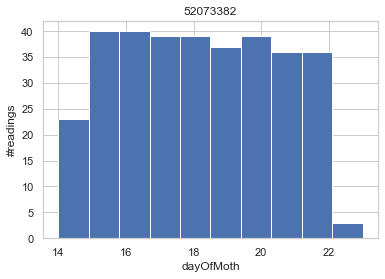

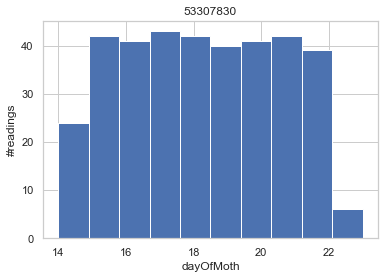

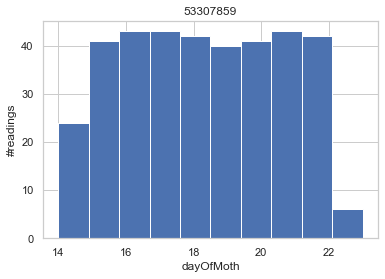

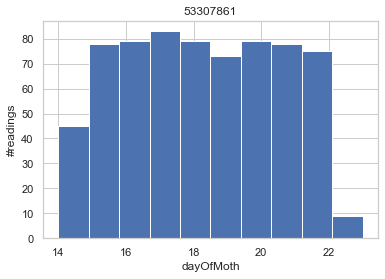

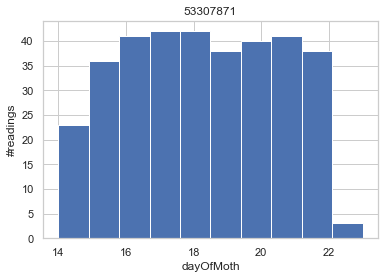

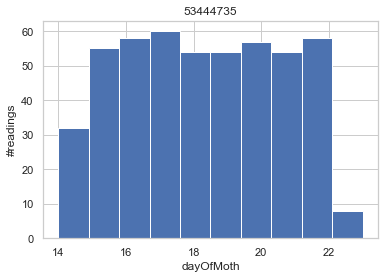

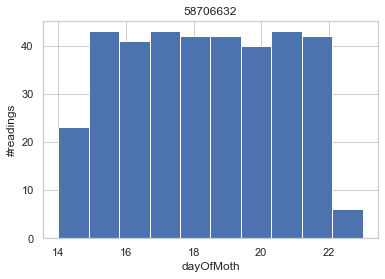

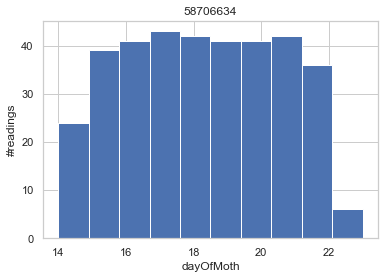

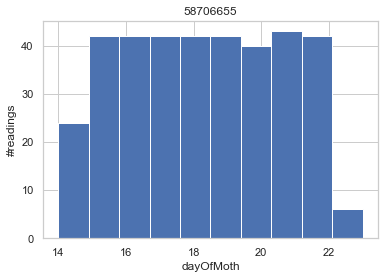

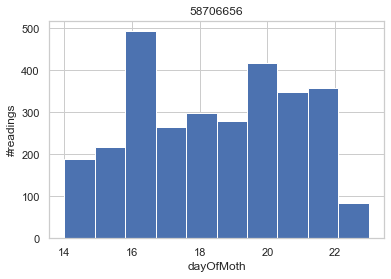

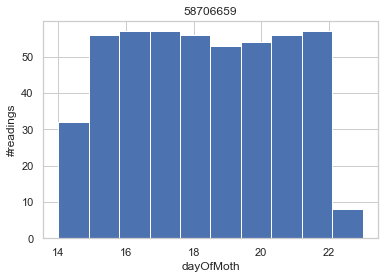

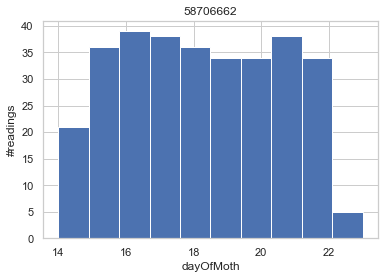

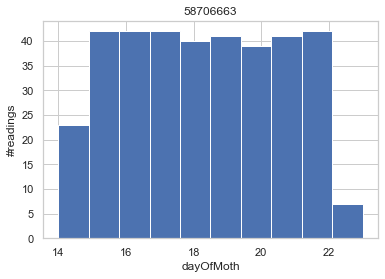

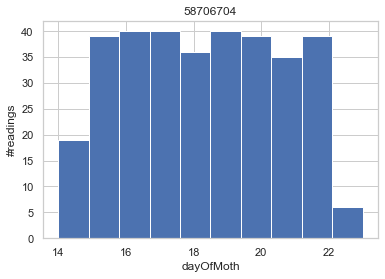

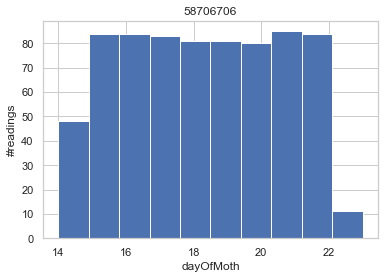

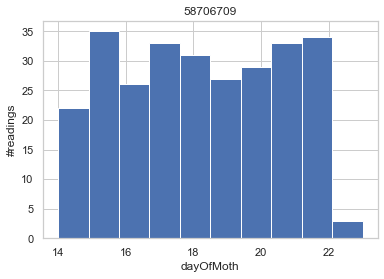

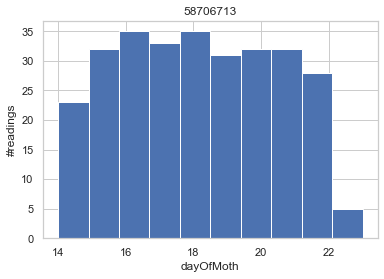

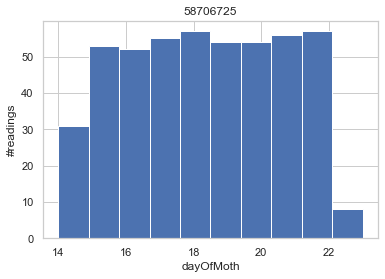

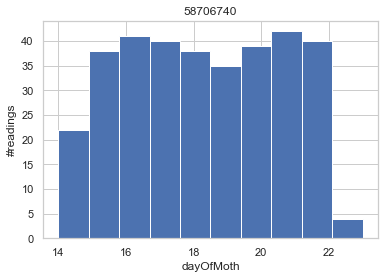

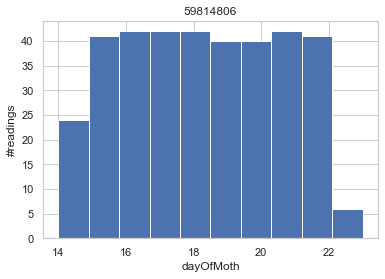

In [6]:

with PdfPages("#mediciones_por_dia_windows.pdf") as pdf:

    for n,g in df.groupby("medidor")["dayMonth"]:
        fig = plt.figure()
        plt.title(n)
        plt.xlabel("dayOfMoth")
        plt.ylabel("#readings")
        g.hist()
        pdf.savefig(fig)

In [8]:
def uniques(df):
    
    a_month =df["fecha"].apply(lambda x: x.day)
    a_month =df["fecha"].apply(lambda x: x.month)
    
    b = df["fecha"].shift()
    b_day = b.apply(lambda x: x.day)
    b_month = b.apply(lambda x: x.month)
    diff = ((a_month != b_month) | (a_month != b_day))     
    count = 0
    before = 0
    serie = []
    for i in diff:
        if (count == 0):
            before = i
        else:
            if (i != before):
                count += 1
            serie.append(count)
    return serie

In [9]:
'''
a_month =df["fecha"].apply(lambda x: x.day)
a_month =df["fecha"].apply(lambda x: x.month)
    
b = df["fecha"].shift()
b_day = b.apply(lambda x: x.day)
b_month = b.apply(lambda x: x.month)
diff = ((a_month != b_month) | (a_month != b_day))     
count = -1
before = 0
serie = []
for i in diff:
    if (count == -1):
        before = i
        count +=1
    else:
        if (i != before):
            count += 1
        before = i
        serie.append(count)
'''

'\na_month =df["fecha"].apply(lambda x: x.day)\na_month =df["fecha"].apply(lambda x: x.month)\n    \nb = df["fecha"].shift()\nb_day = b.apply(lambda x: x.day)\nb_month = b.apply(lambda x: x.month)\ndiff = ((a_month != b_month) | (a_month != b_day))     \ncount = -1\nbefore = 0\nserie = []\nfor i in diff:\n    if (count == -1):\n        before = i\n        count +=1\n    else:\n        if (i != before):\n            count += 1\n        before = i\n        serie.append(count)\n'

In [10]:
def unique(df):
    a_month =df["fecha"].apply(lambda x: x.day)
    a_month =df["fecha"].apply(lambda x: x.month)

    b = df["fecha"].shift()
    b_day = b.apply(lambda x: x.day)
    b_month = b.apply(lambda x: x.month)
    diff = ((a_month != b_month) | (a_month != b_day))     
    count = -1
    before = 0
    serie = []
    for i in diff:
        if (count == -1):
            before = i
            count +=1
        else:
            if (i != before):
                count += 1
            before = i
            serie.append(count)
    dataframe = pd.DataFrame(serie)
    return dataframe

In [11]:
'''
for n,g in df.groupby("medidor"):
    reading_per_day = unique(df)
    figure = plt.figure()
    reading_per_day.hist()
'''

'\nfor n,g in df.groupby("medidor"):\n    reading_per_day = unique(df)\n    figure = plt.figure()\n    reading_per_day.hist()\n'

In [12]:
#df["fecha"] = pd.to_datetime(df["fecha"])

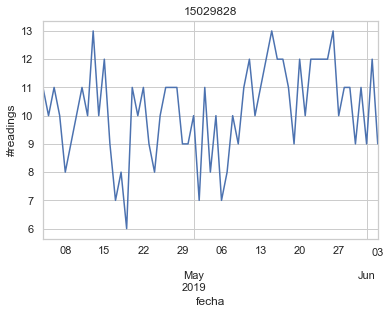

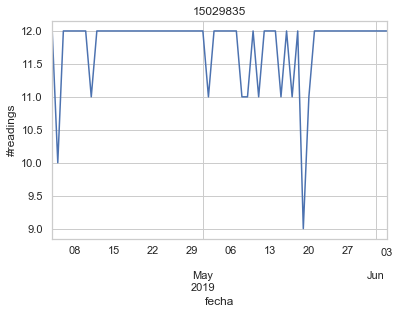

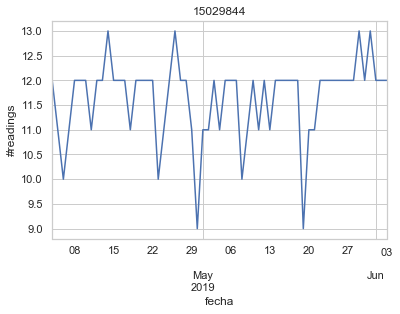

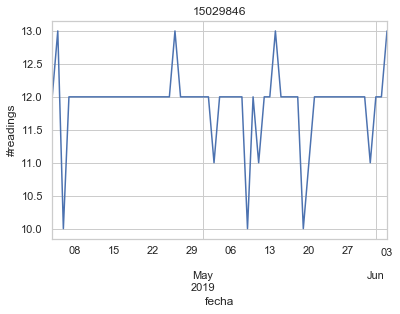

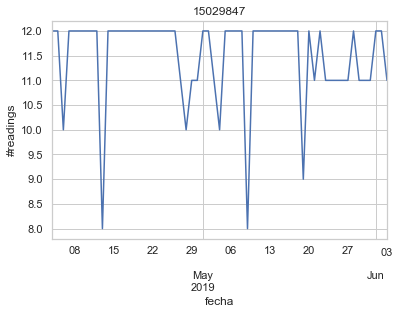

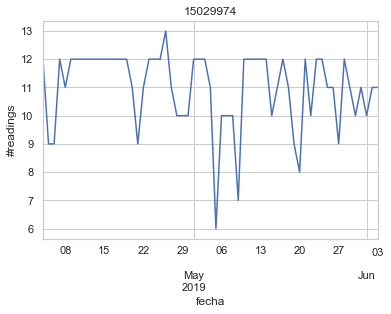

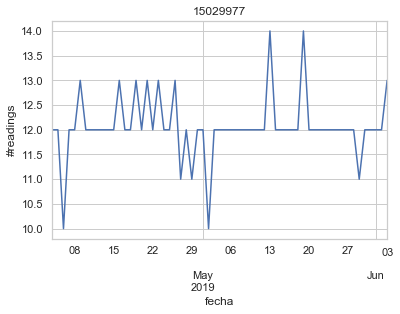

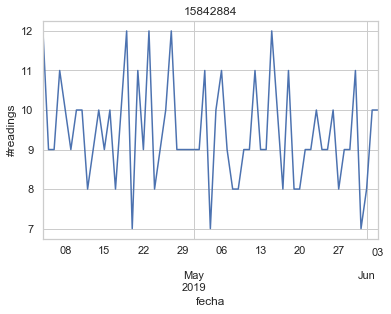

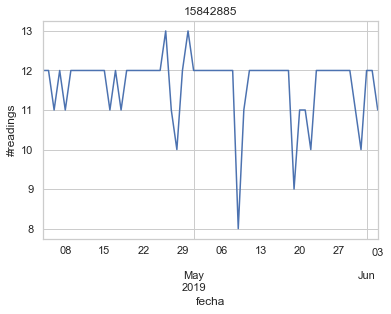

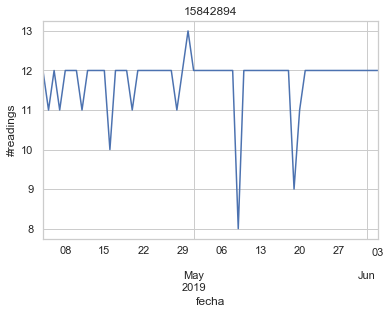

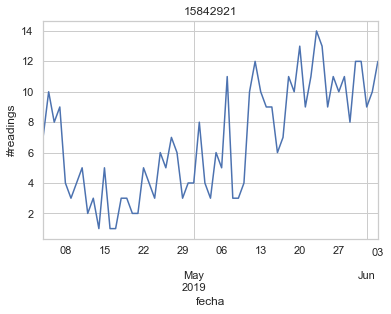

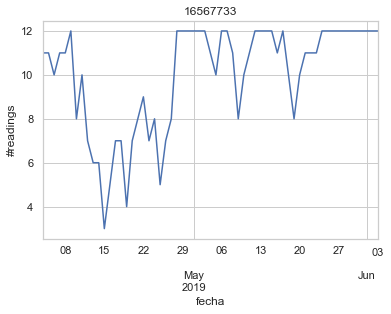

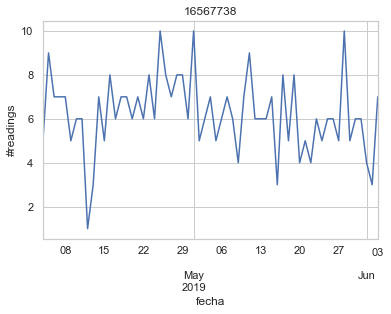

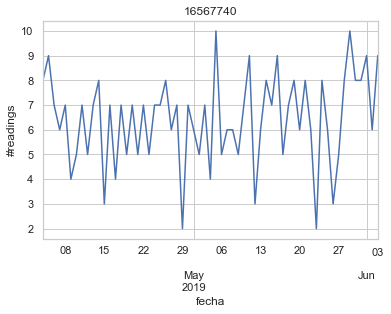

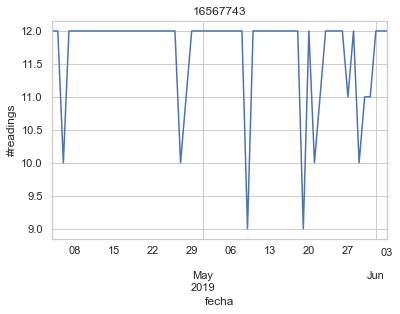

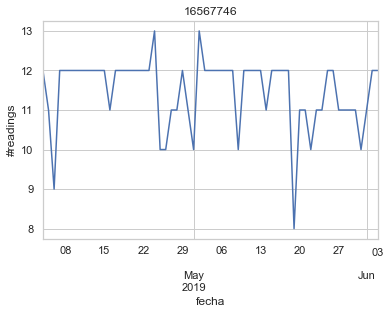

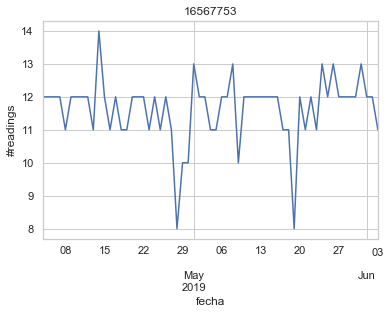

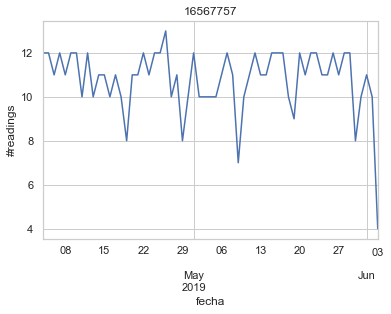

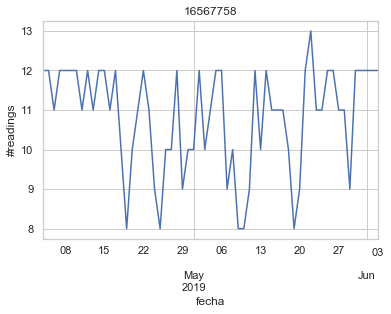

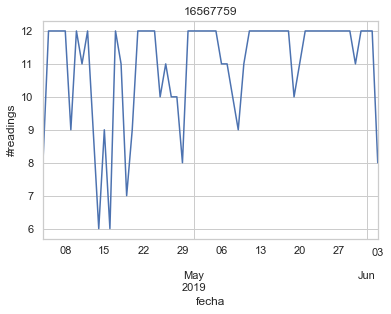

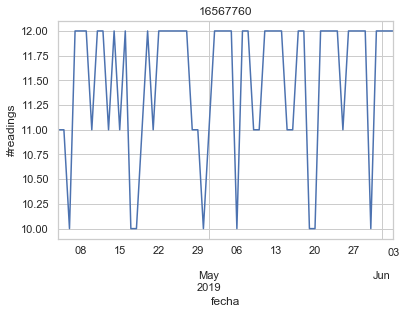

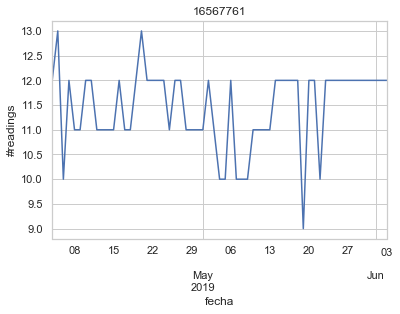

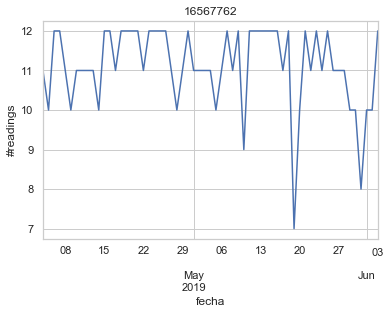

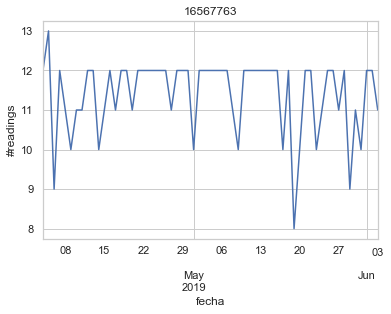

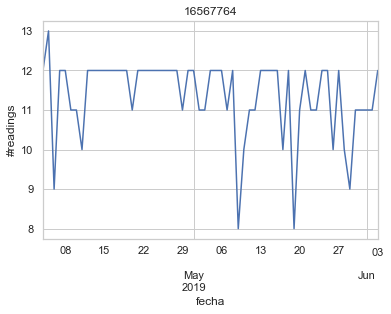

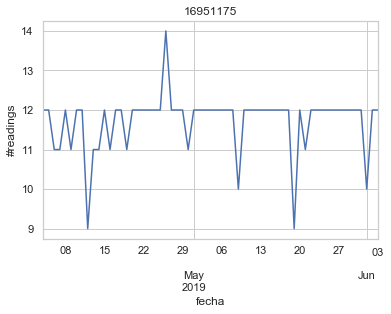

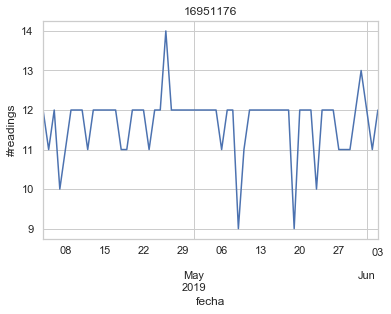

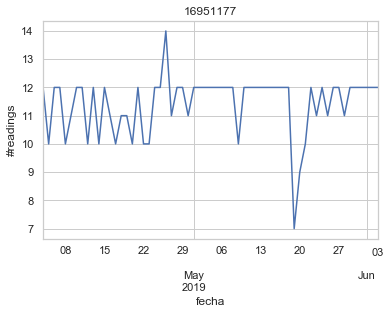

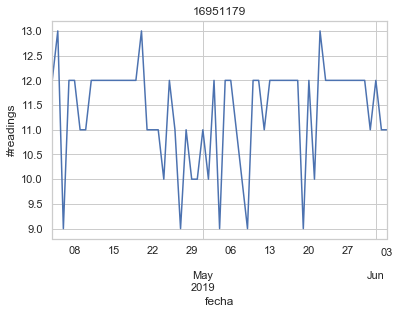

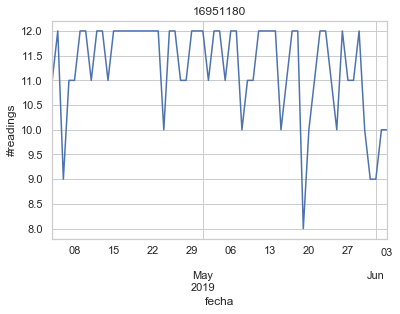

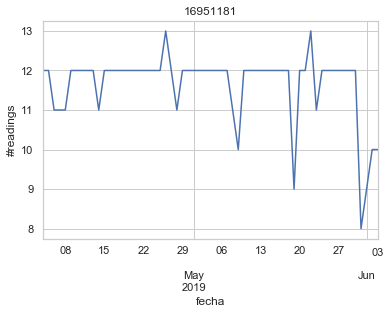

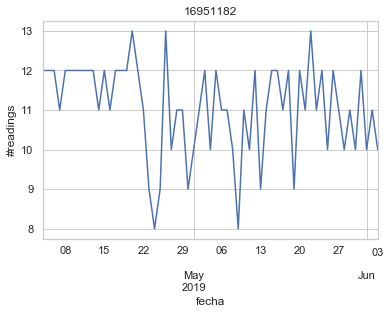

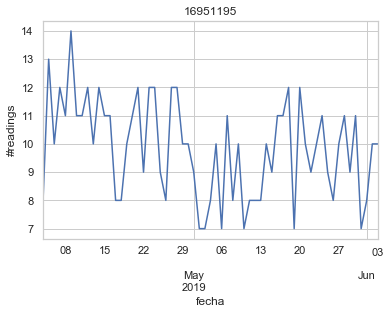

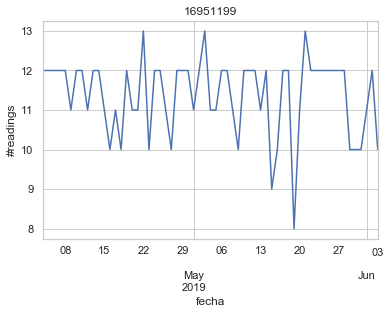

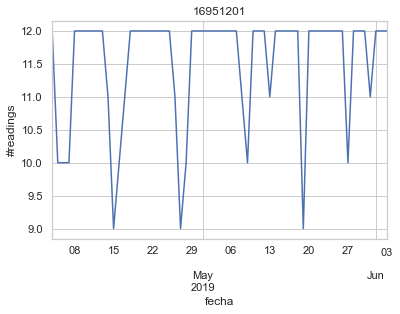

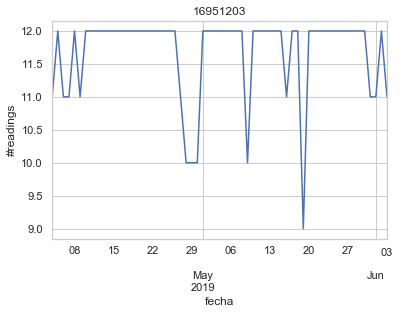

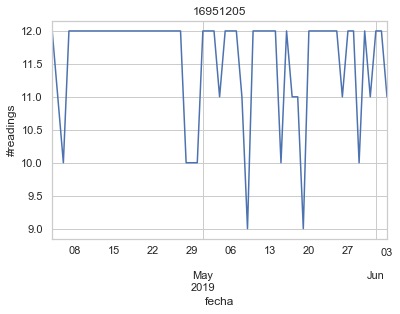

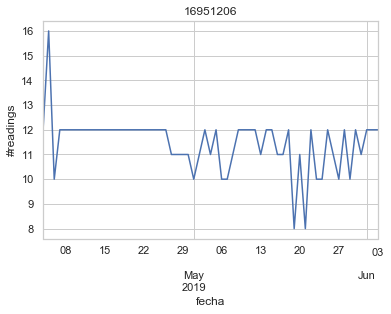

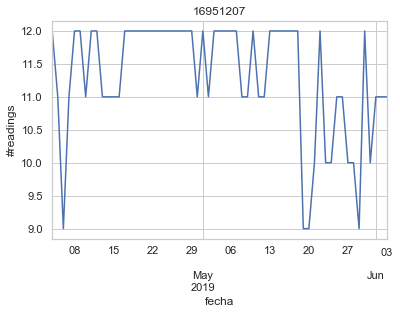

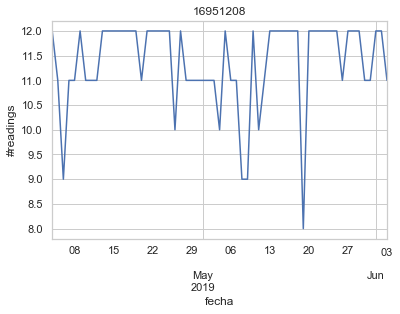

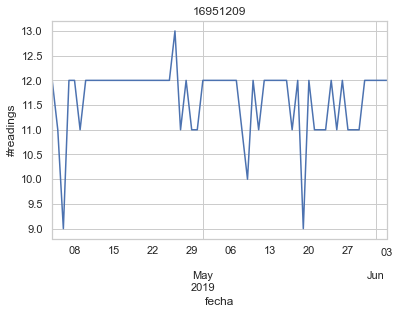

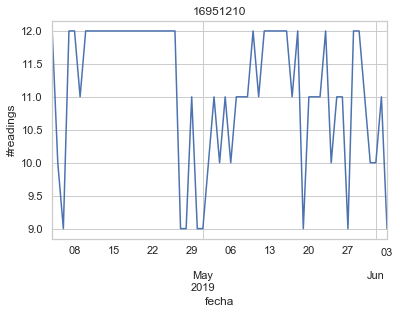

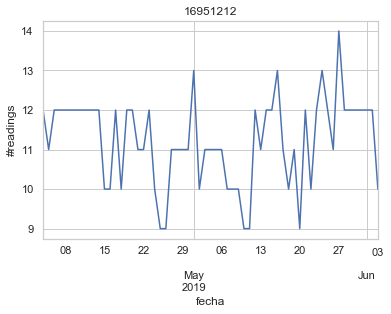

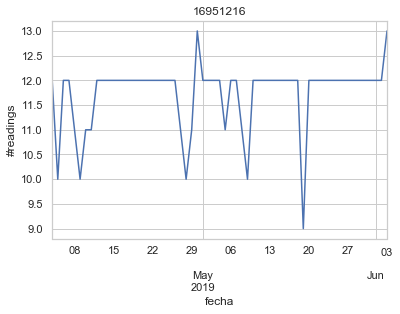

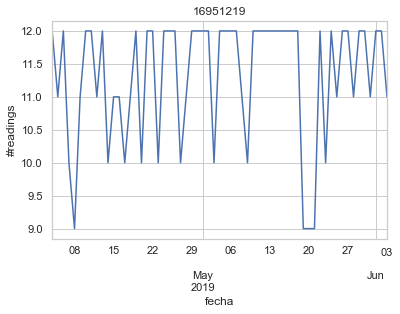

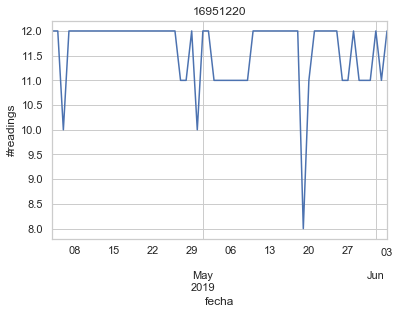

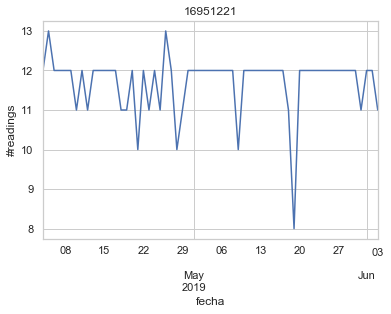

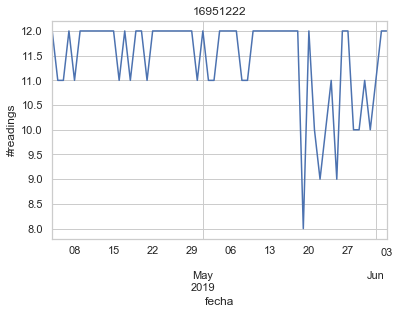

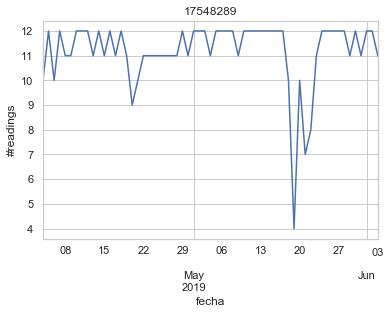

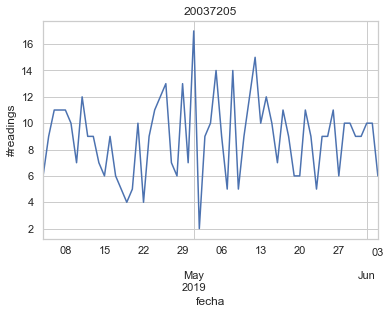

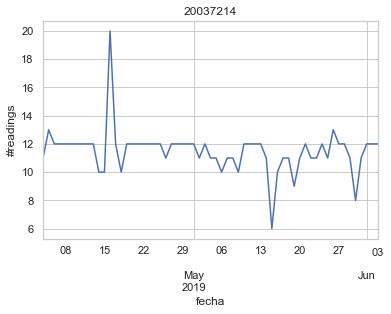

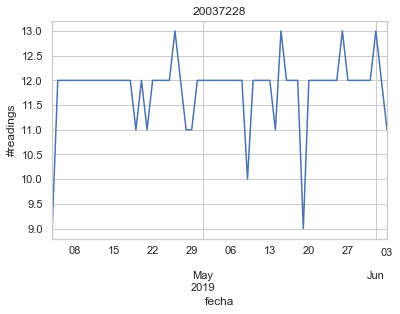

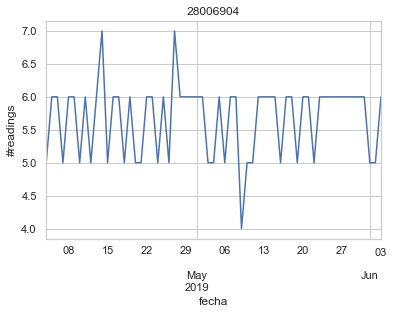

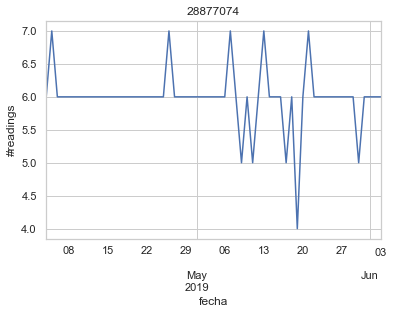

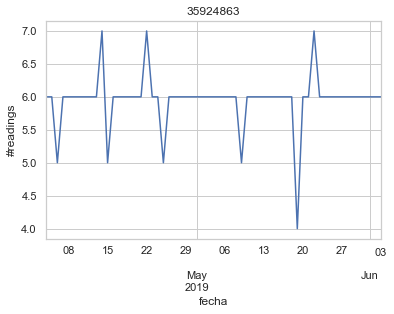

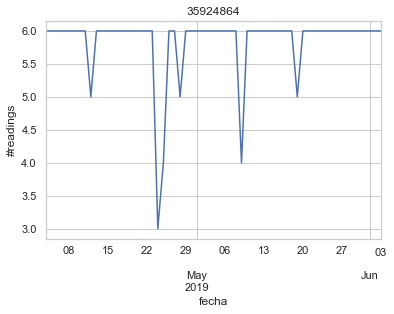

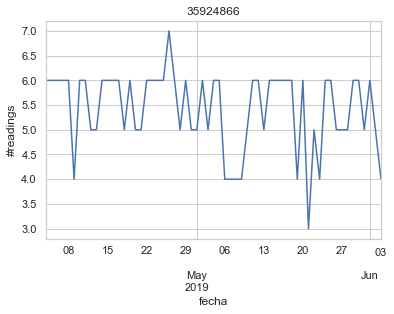

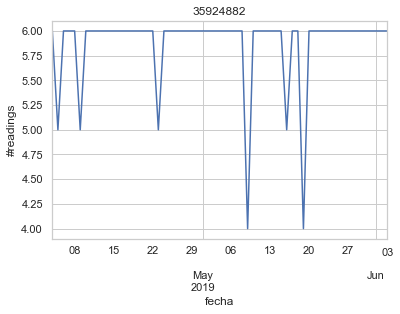

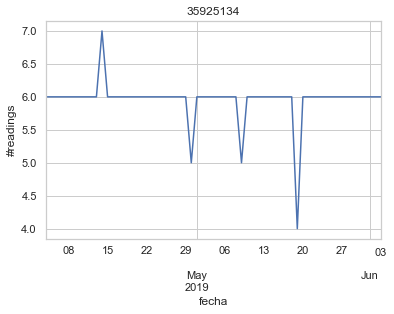

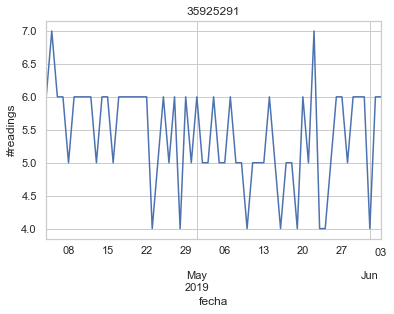

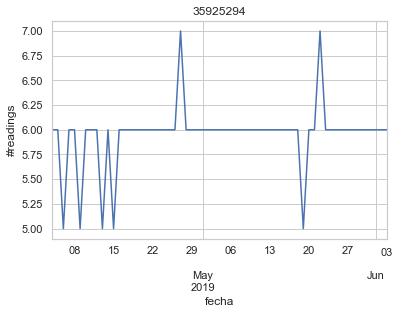

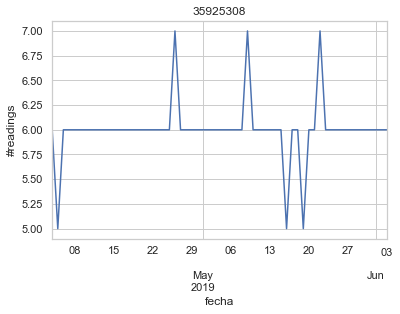

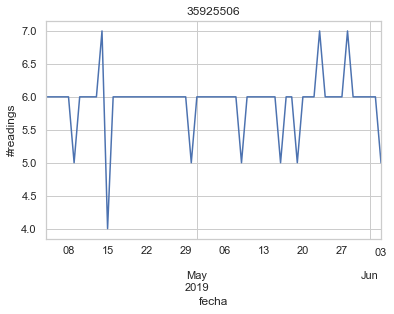

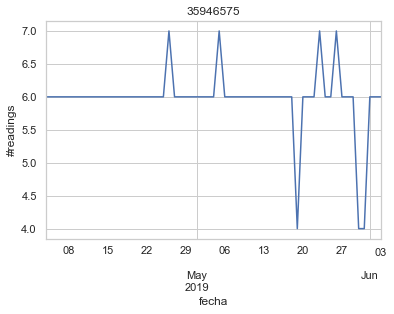

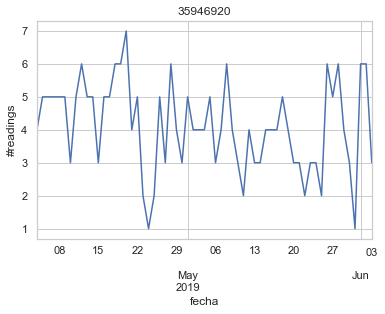

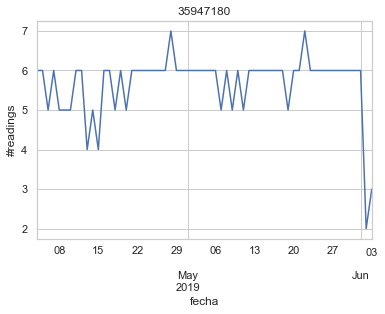

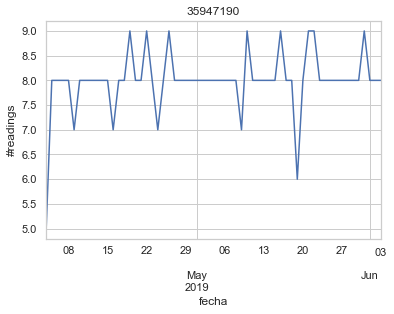

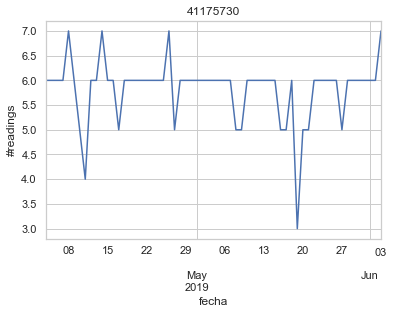

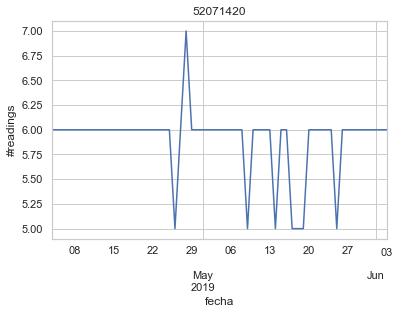

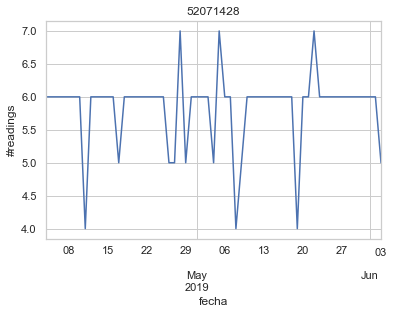

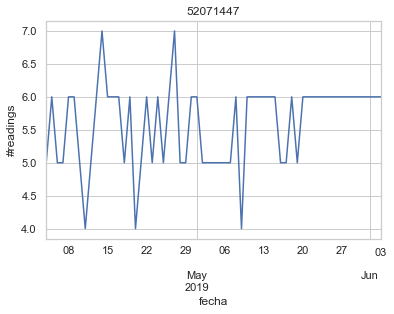

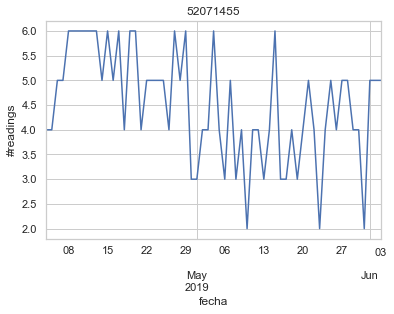

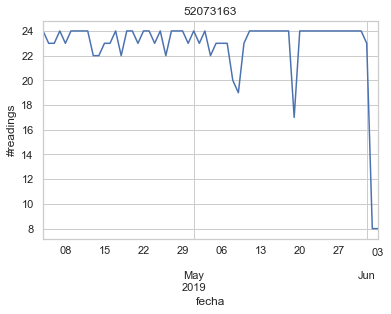

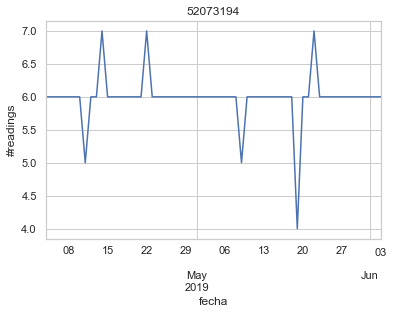

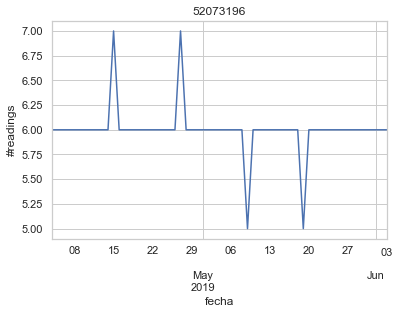

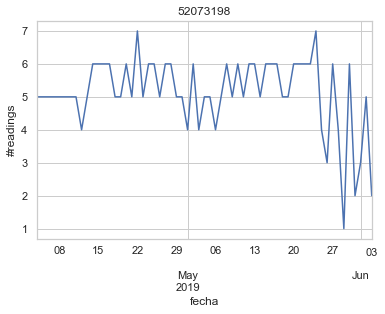

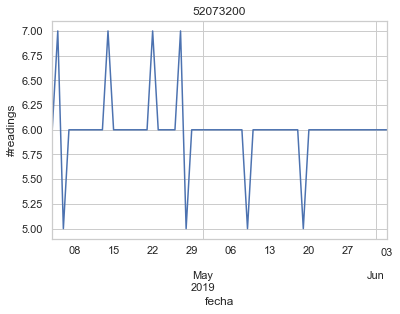

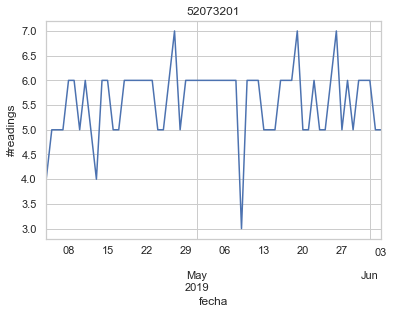

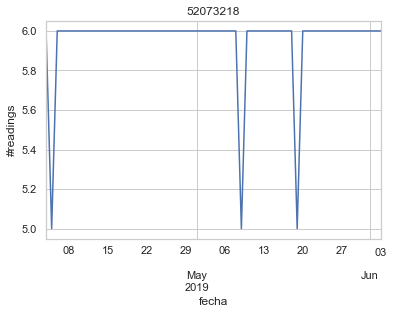

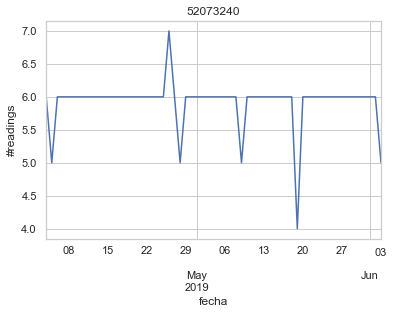

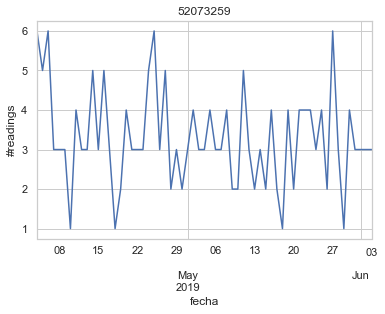

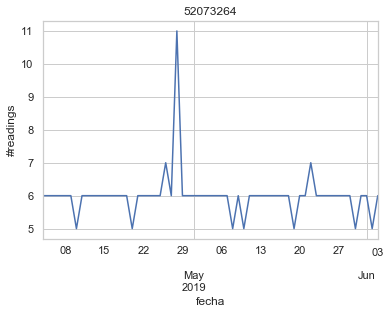

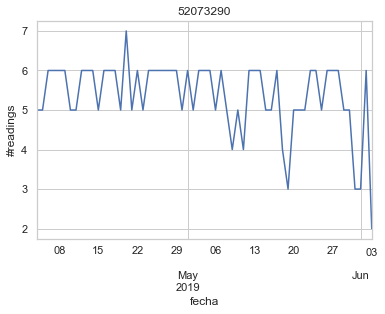

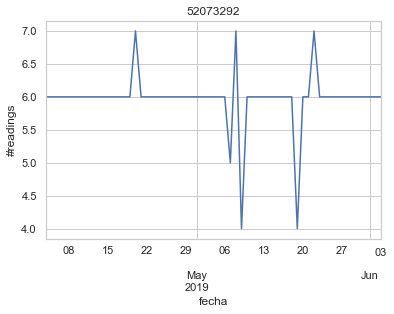

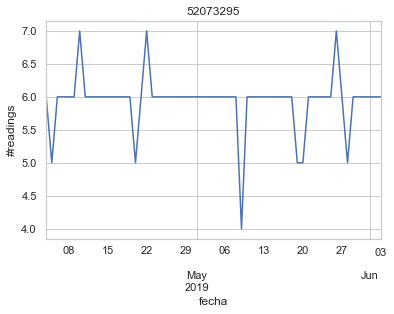

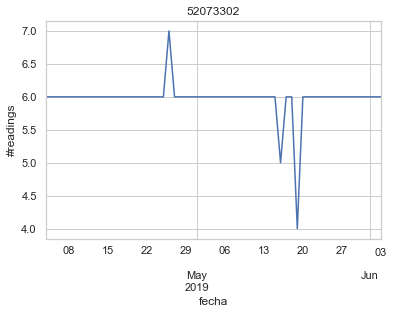

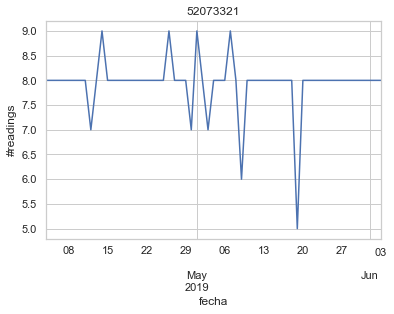

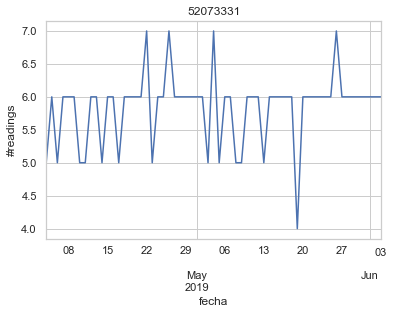

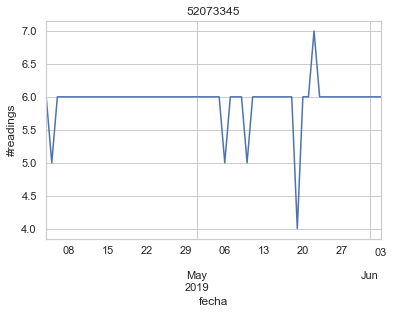

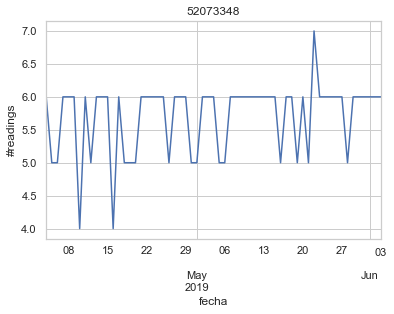

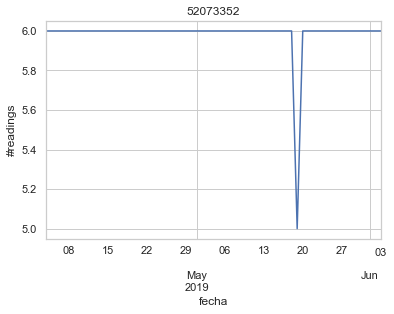

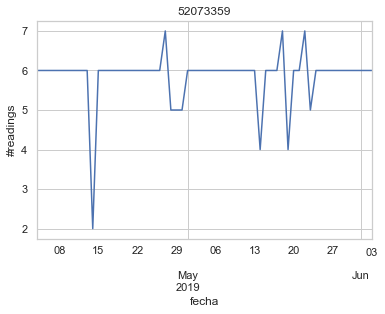

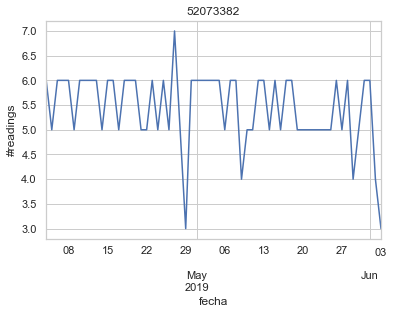

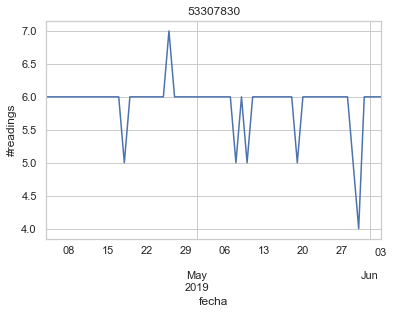

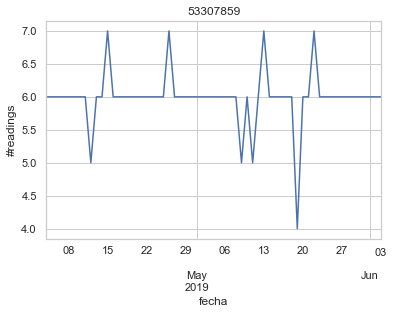

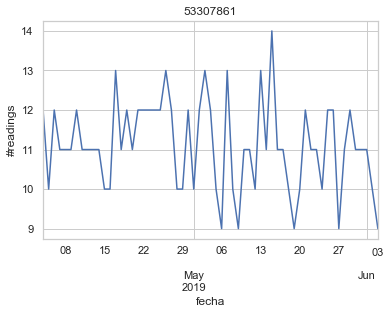

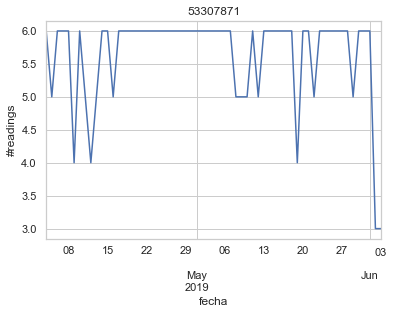

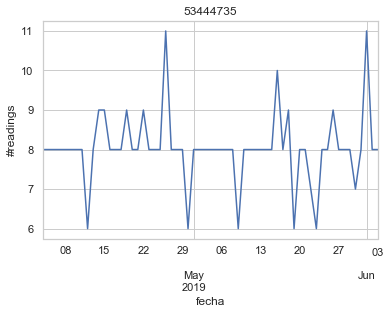

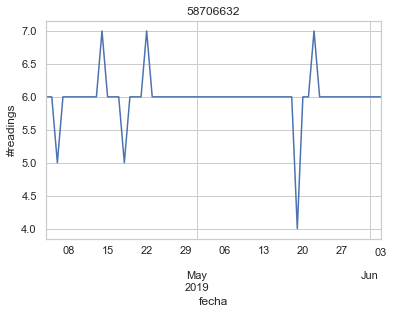

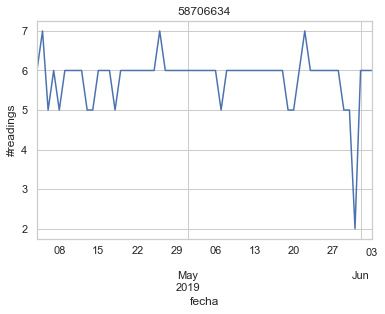

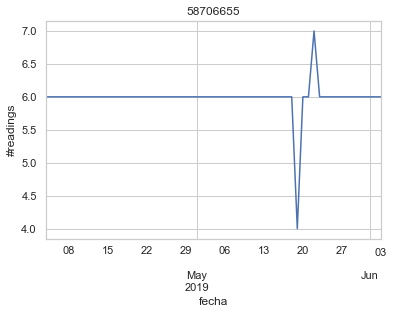

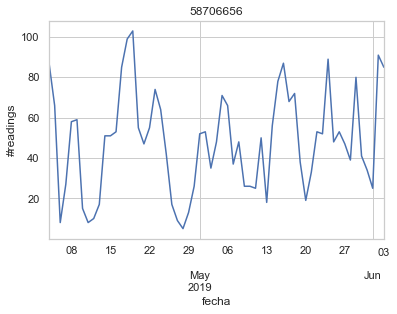

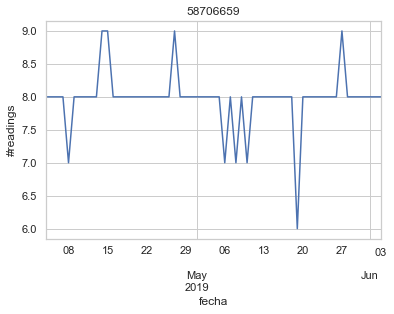

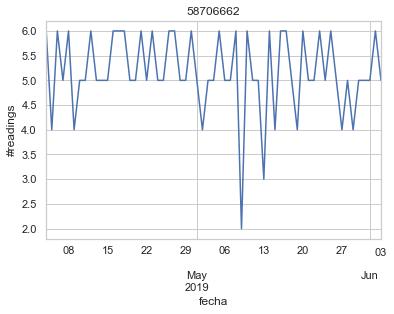

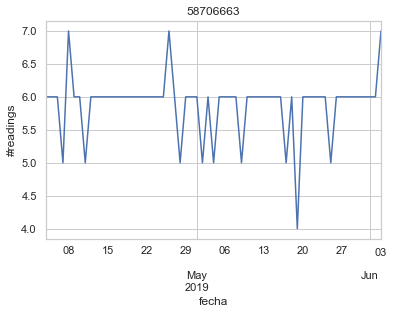

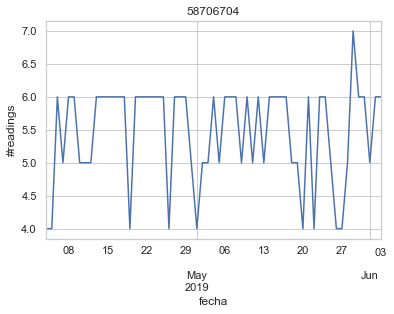

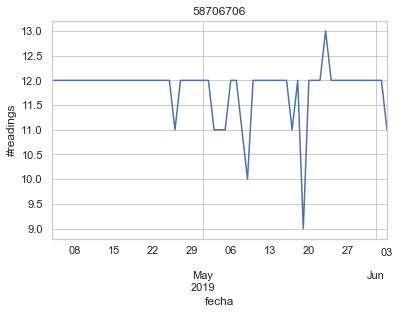

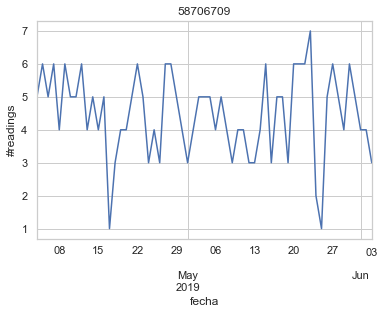

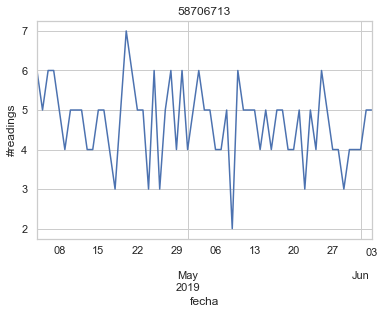

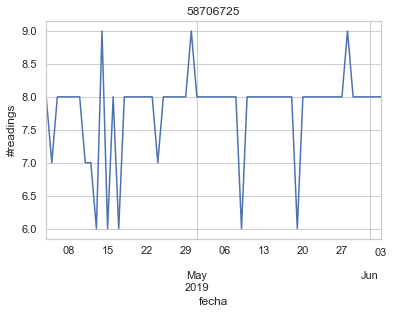

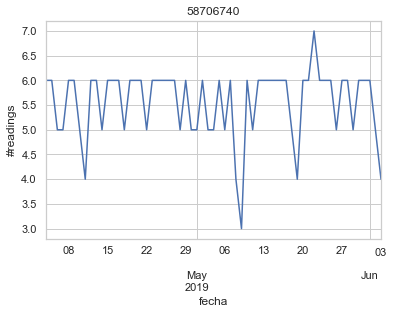

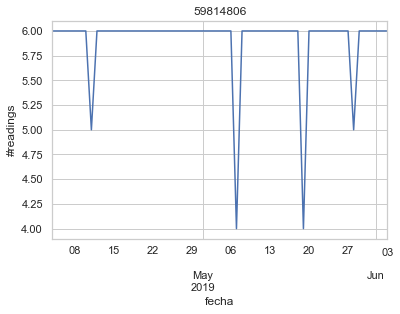

In [23]:
with PdfPages("cada_dia_widows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        g["voltajeA"].plot()
        pdf.savefig(figure)

    

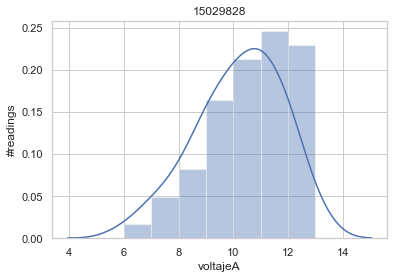

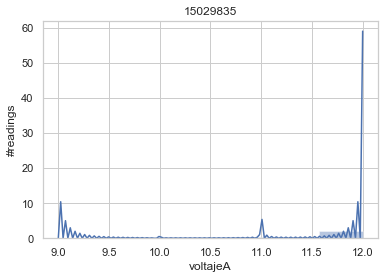

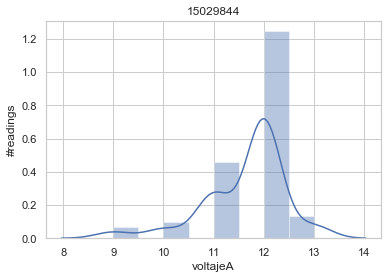

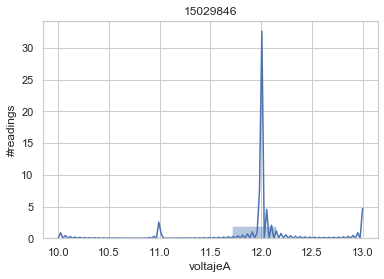

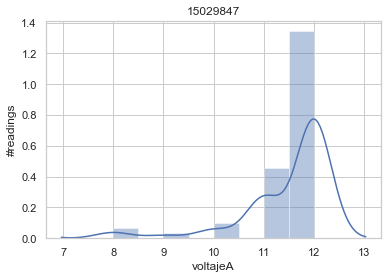

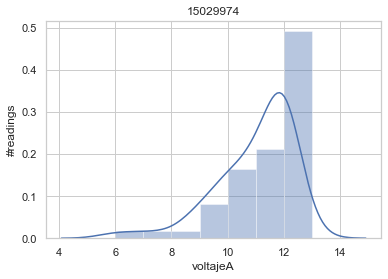

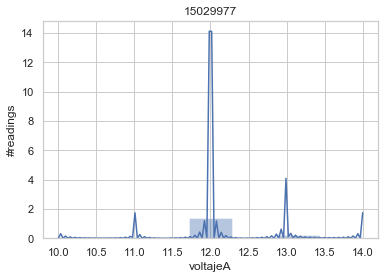

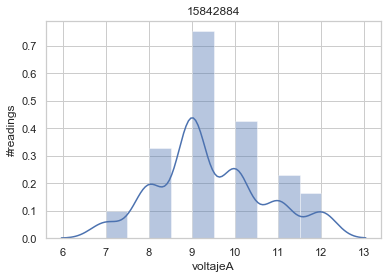

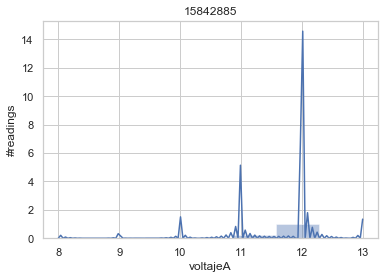

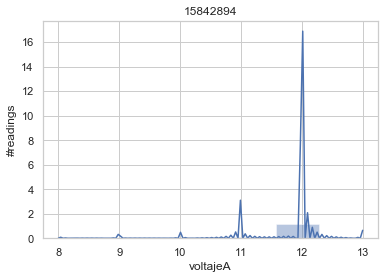

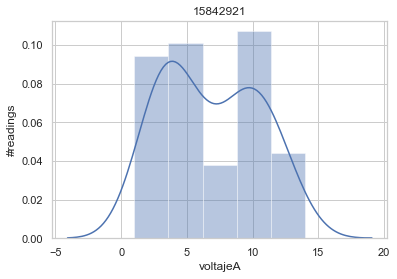

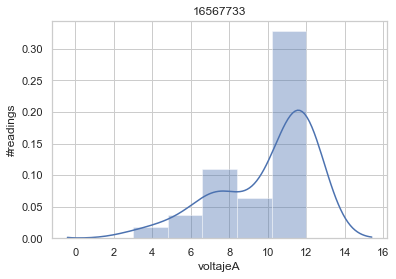

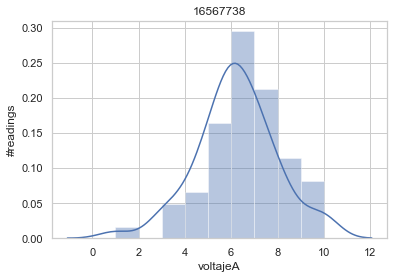

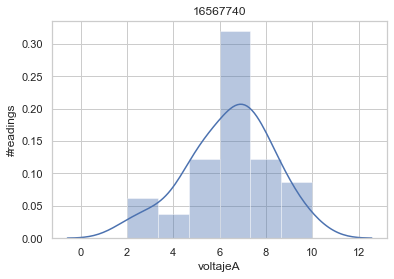

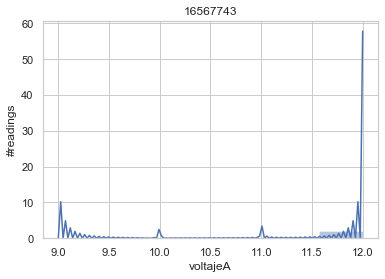

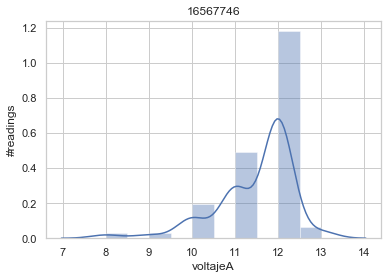

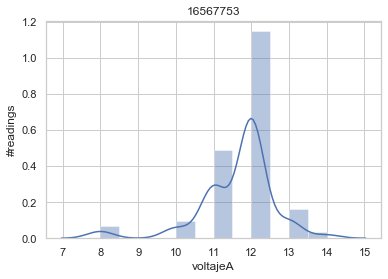

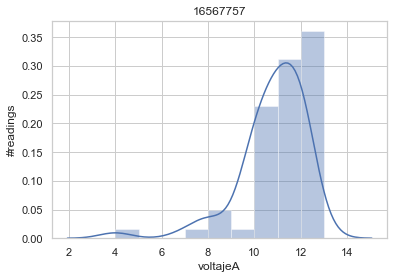

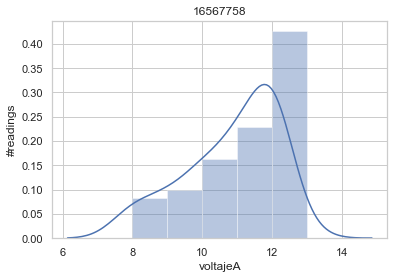

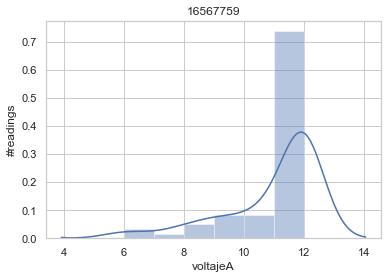

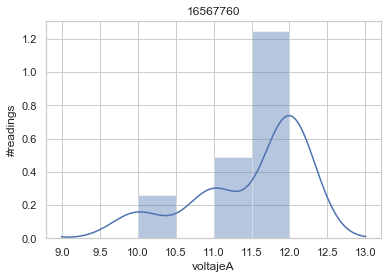

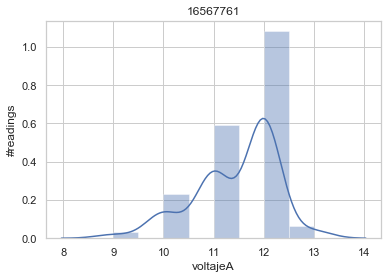

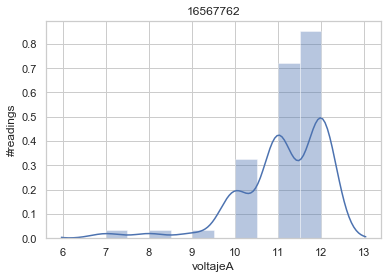

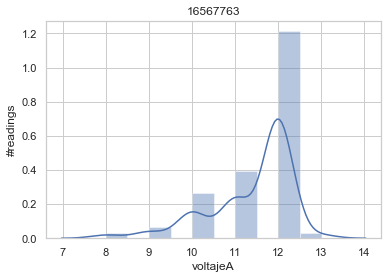

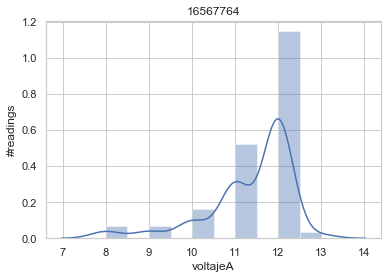

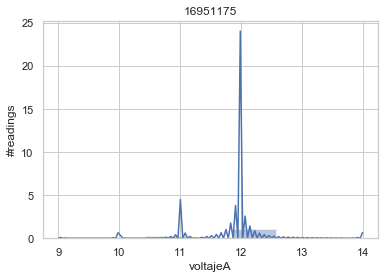

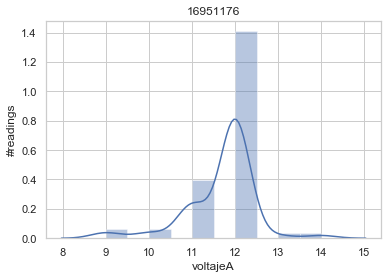

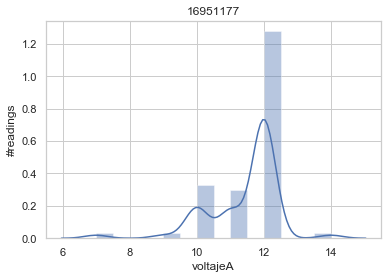

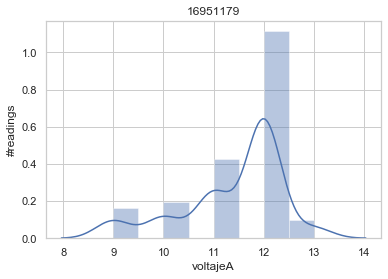

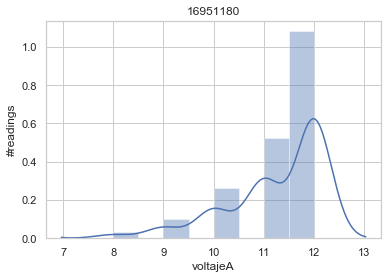

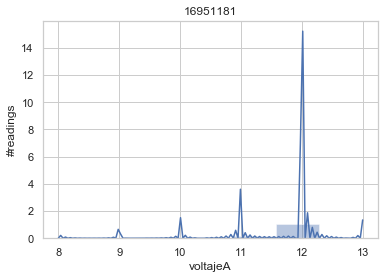

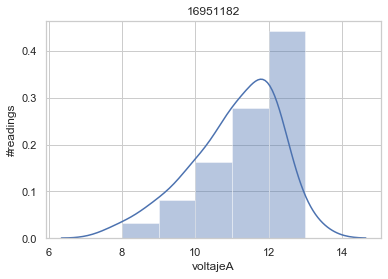

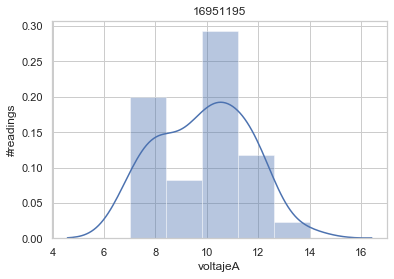

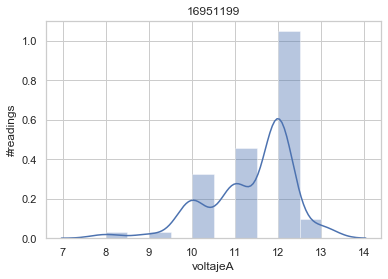

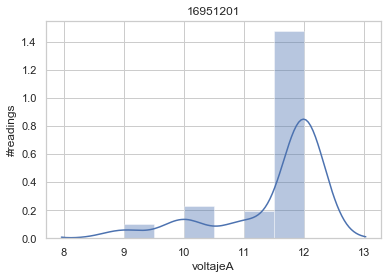

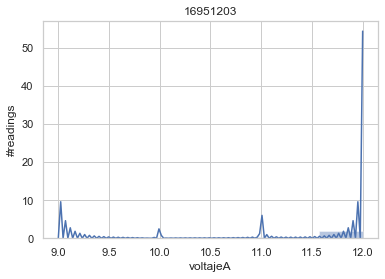

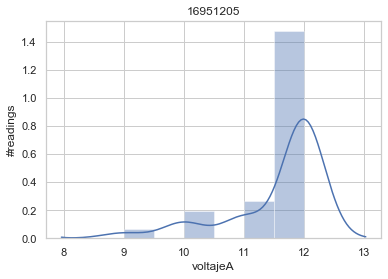

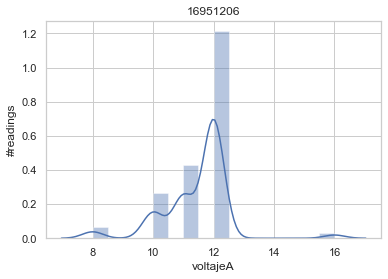

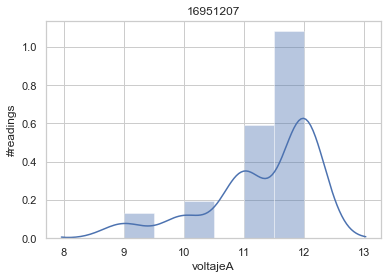

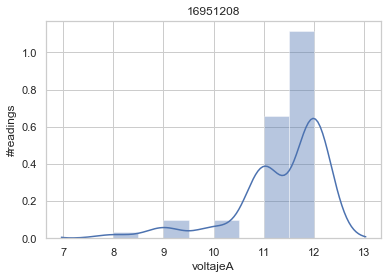

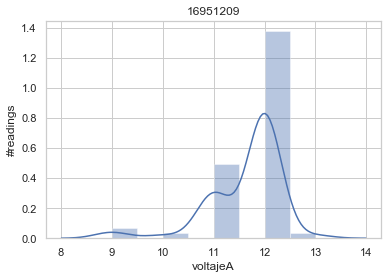

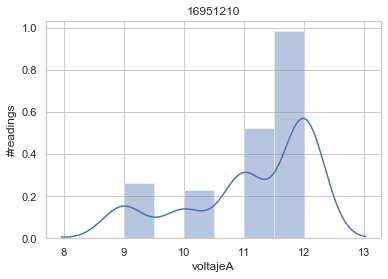

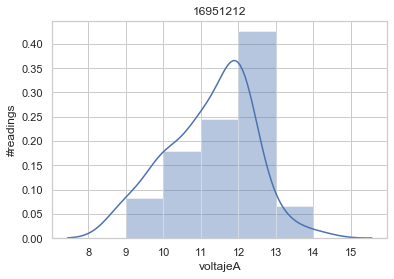

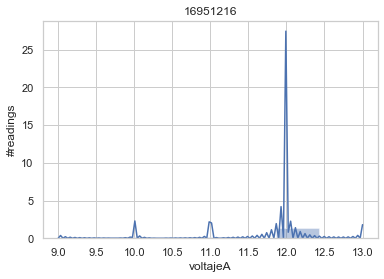

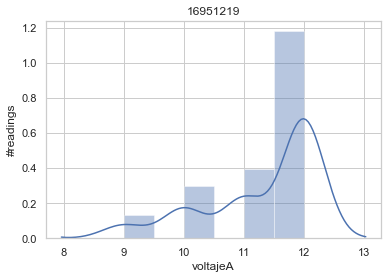

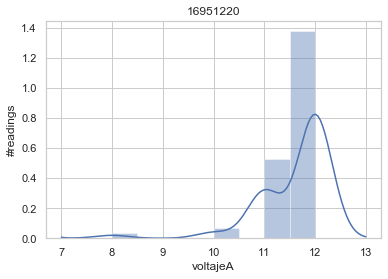

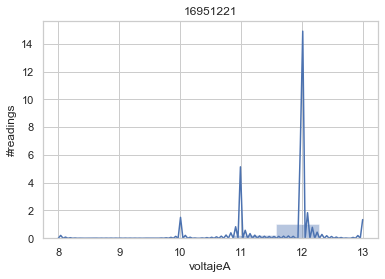

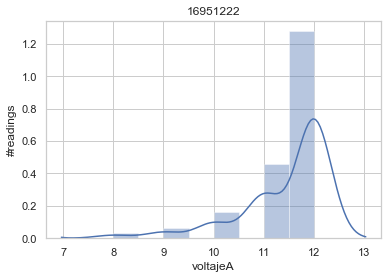

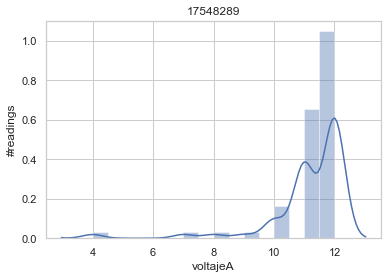

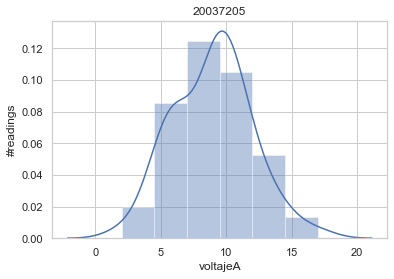

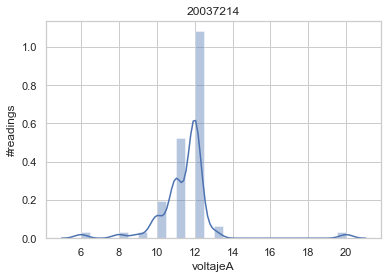

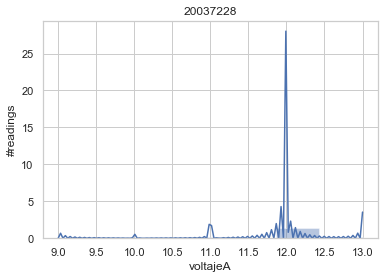

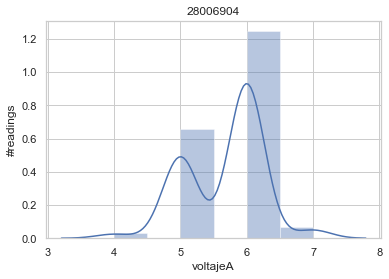

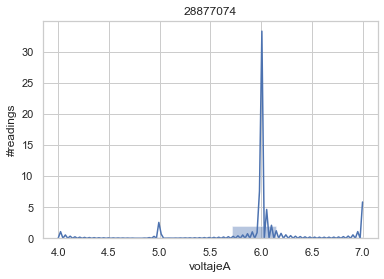

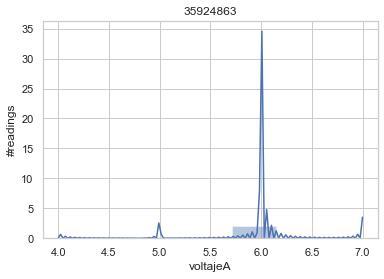

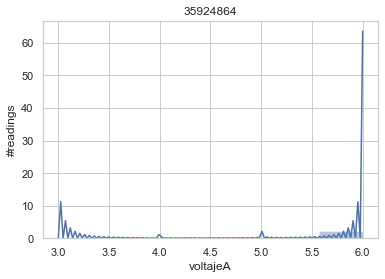

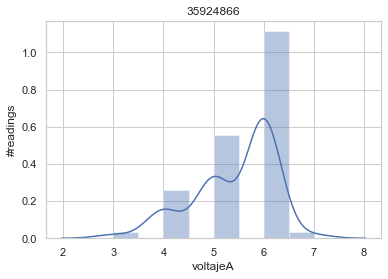

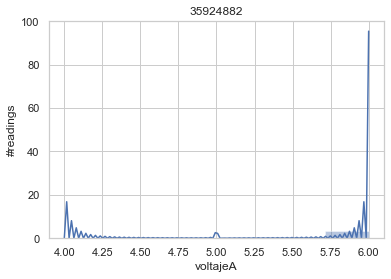

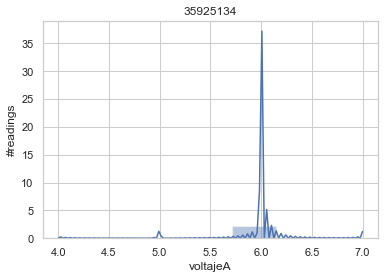

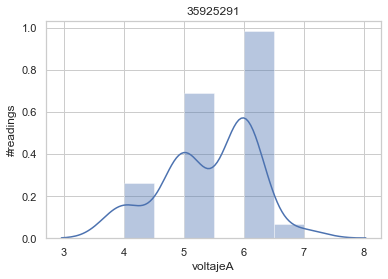

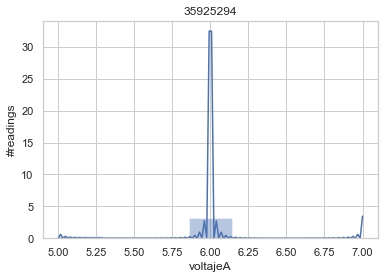

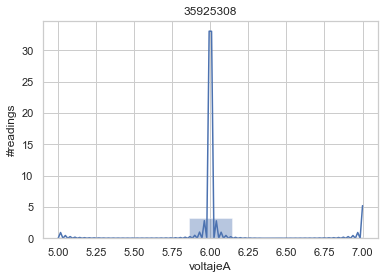

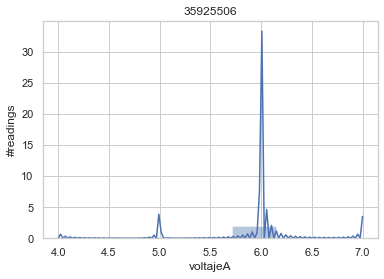

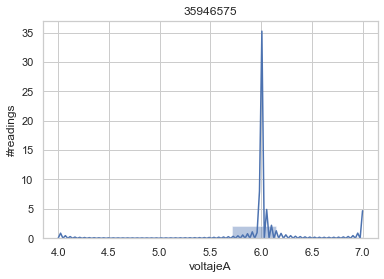

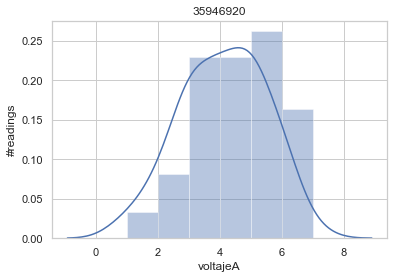

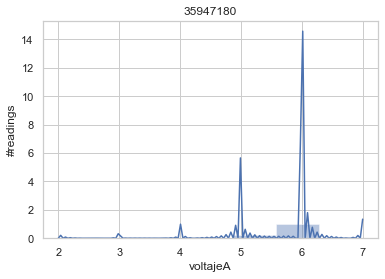

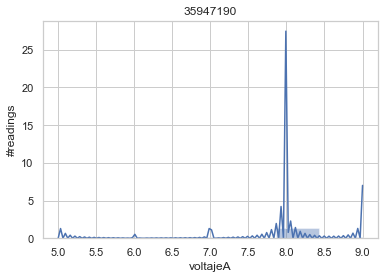

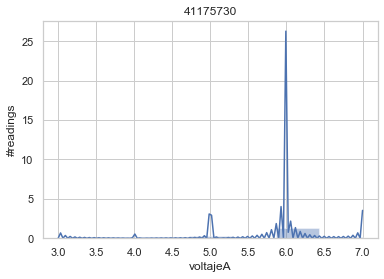

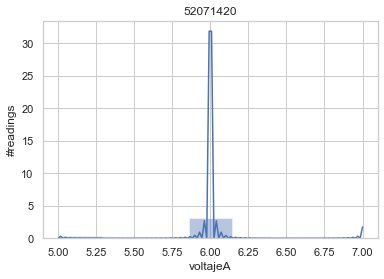

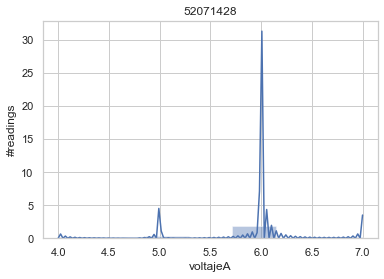

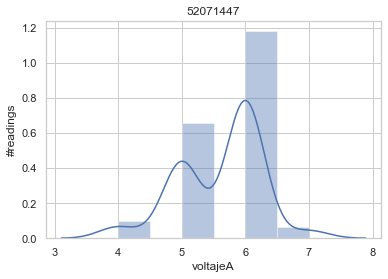

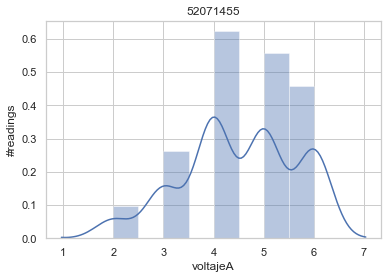

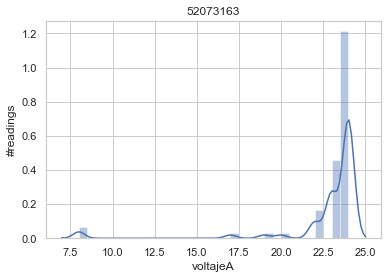

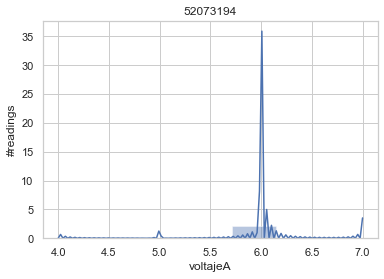

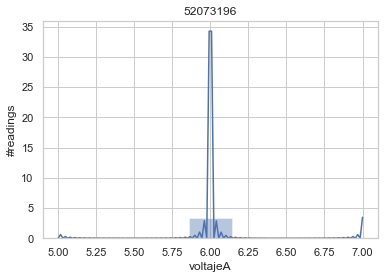

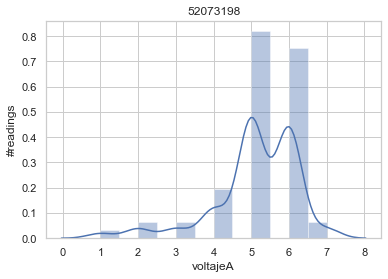

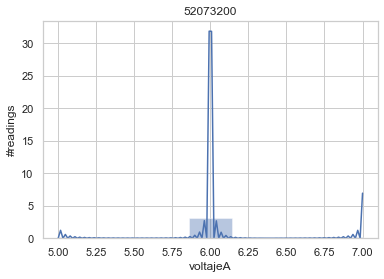

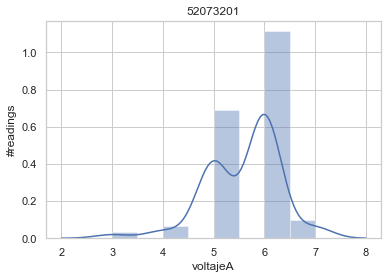

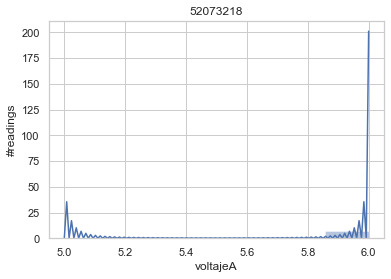

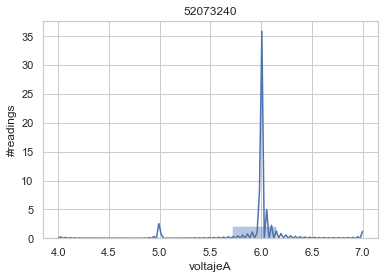

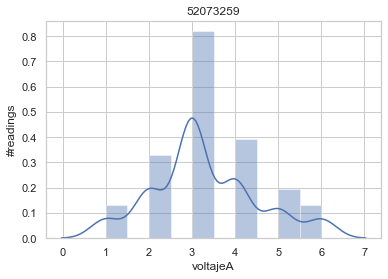

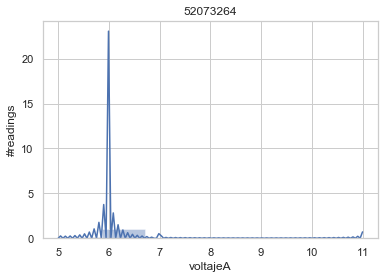

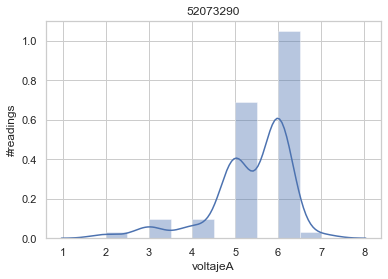

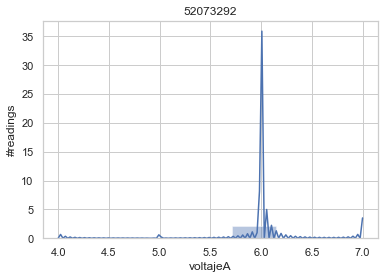

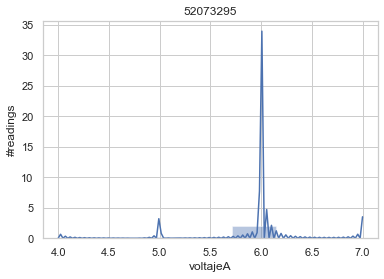

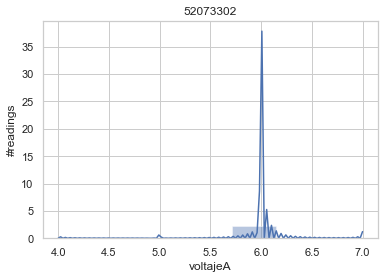

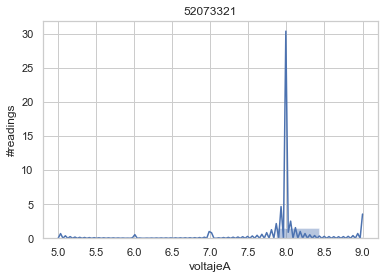

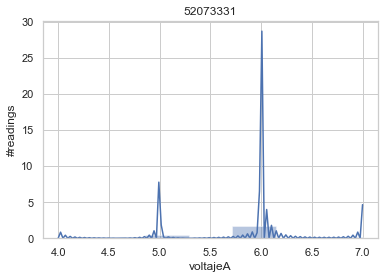

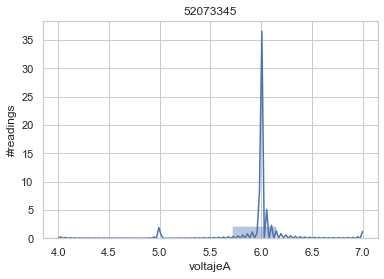

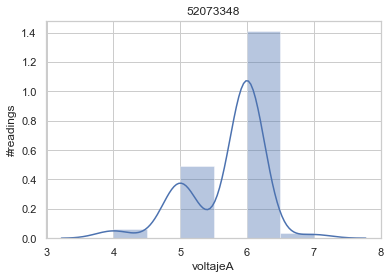

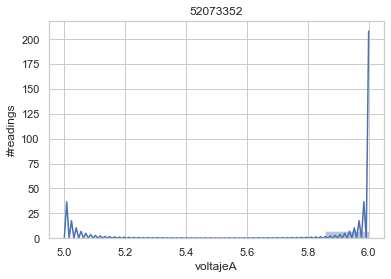

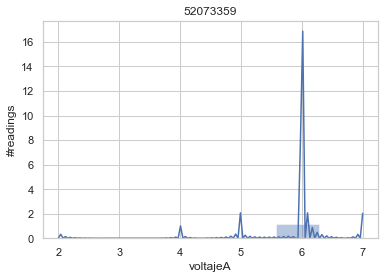

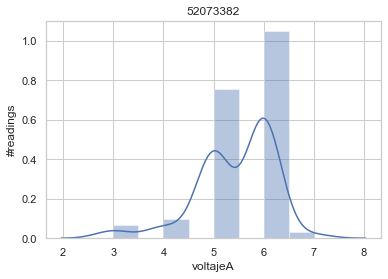

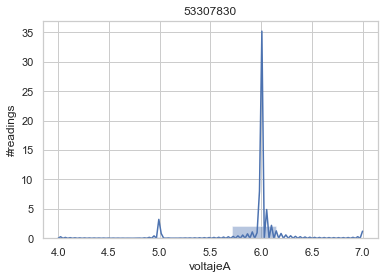

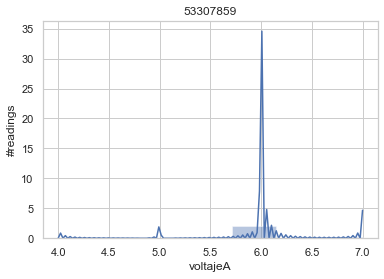

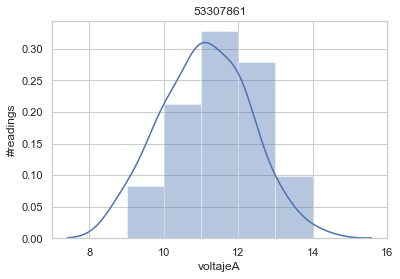

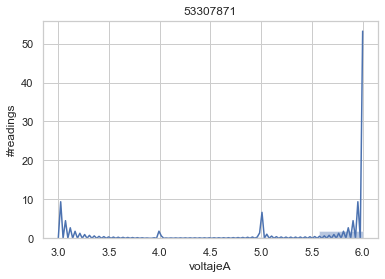

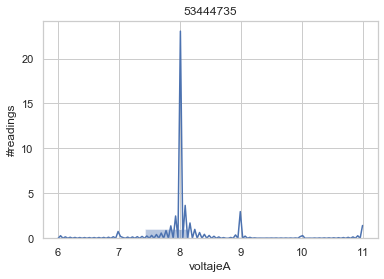

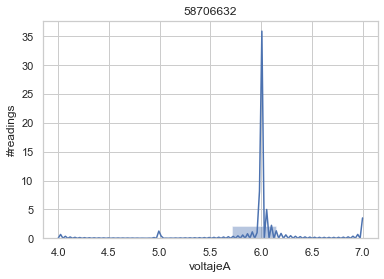

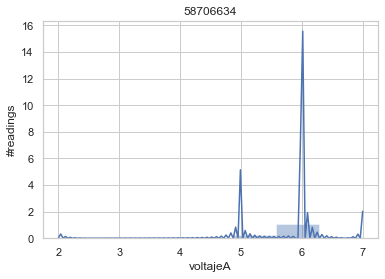

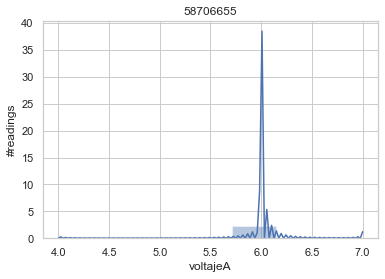

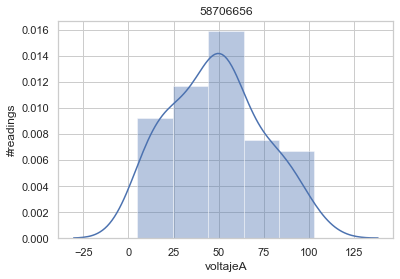

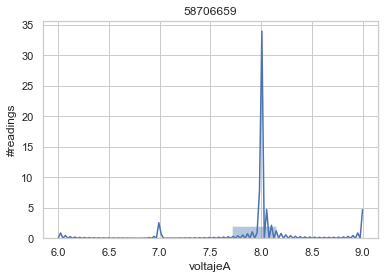

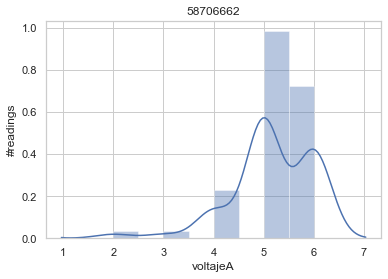

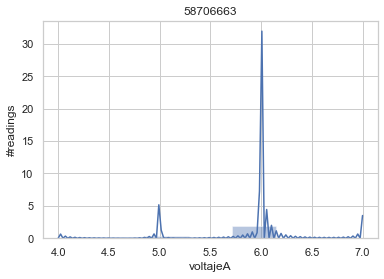

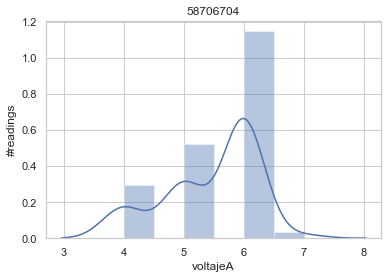

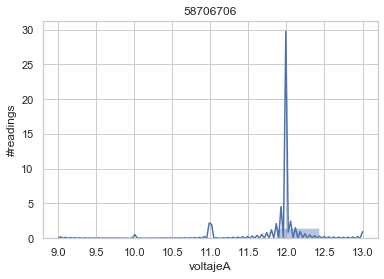

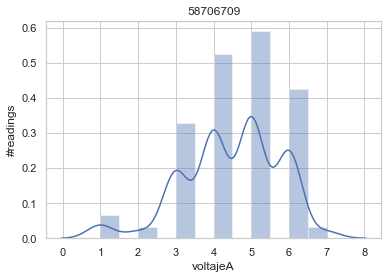

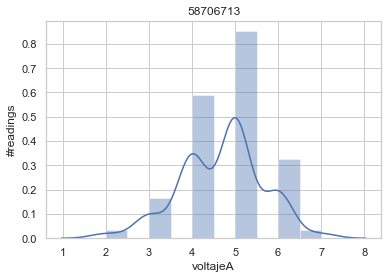

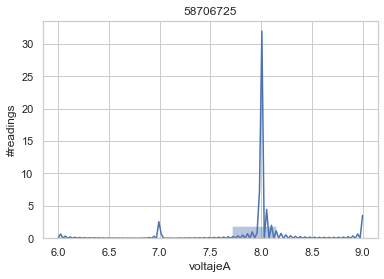

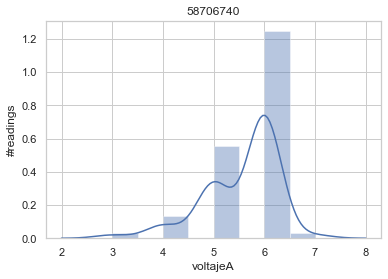

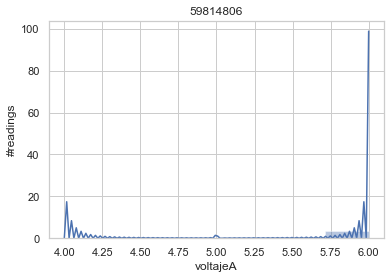

In [26]:
with PdfPages("cada_dia_barplot_widows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        sns.distplot(g["voltajeA"])
        pdf.savefig(figure)

    

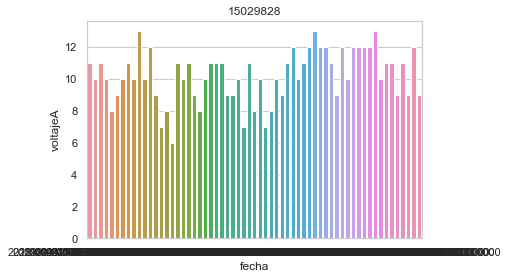

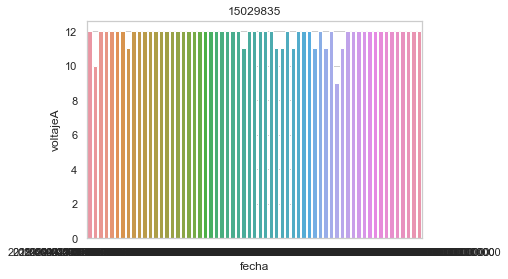

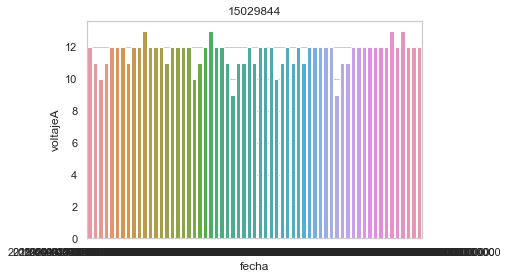

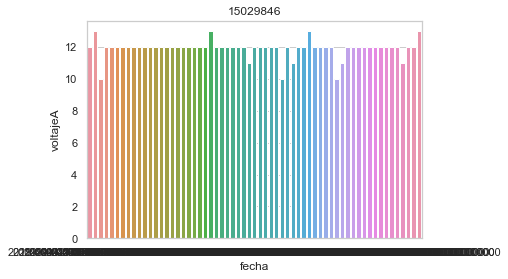

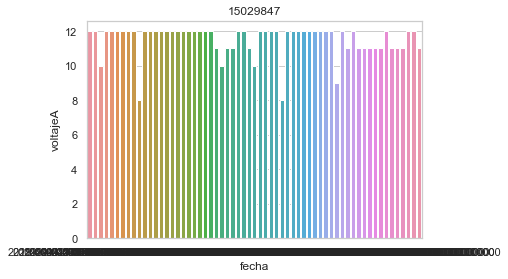

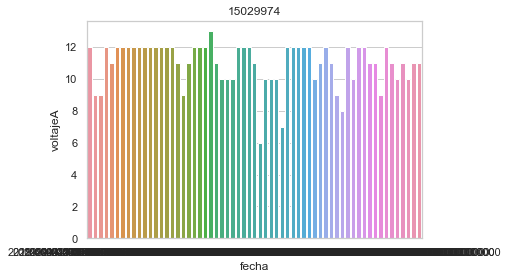

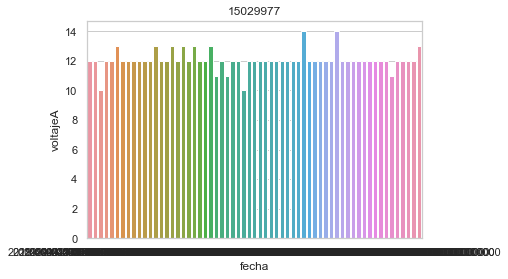

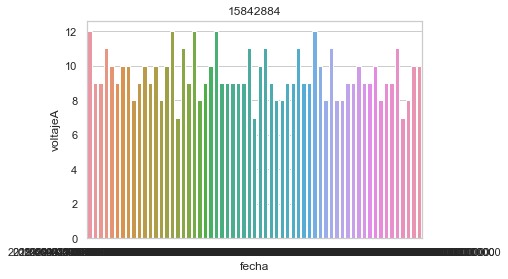

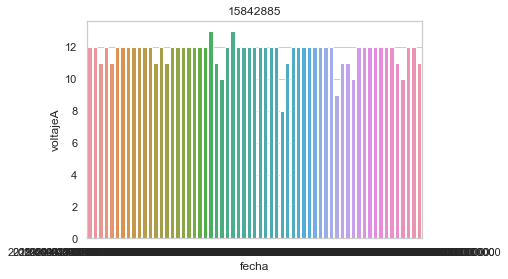

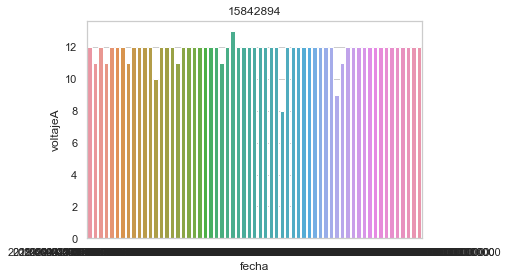

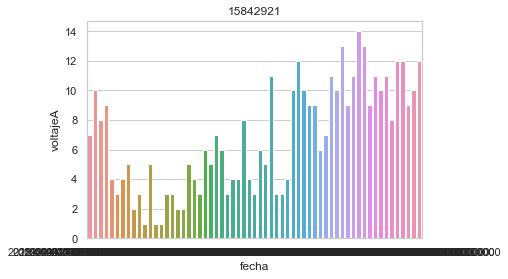

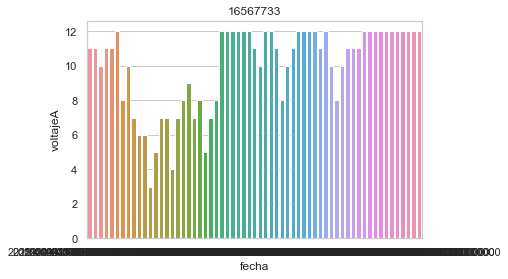

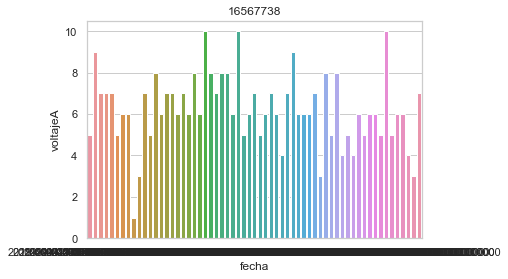

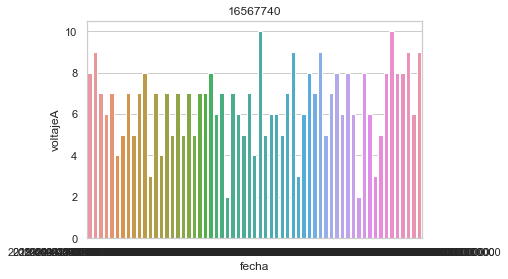

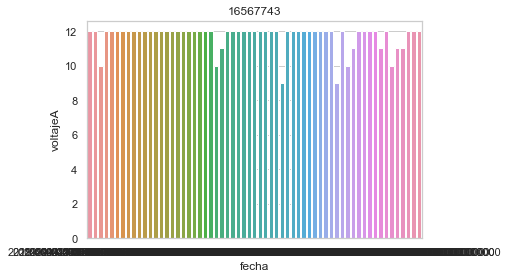

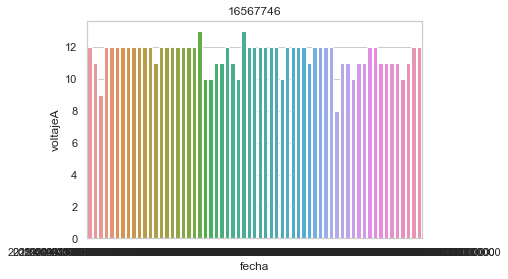

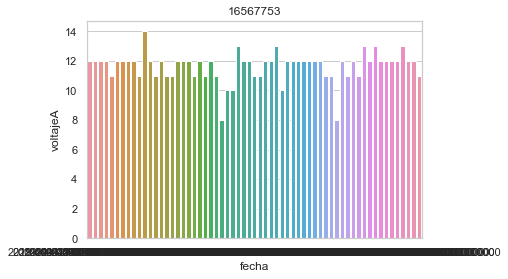

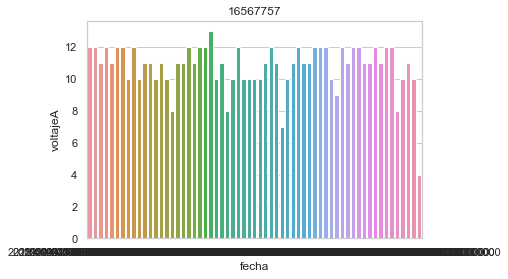

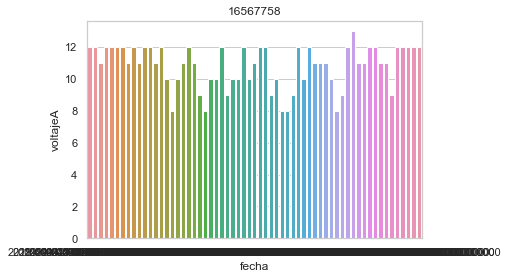

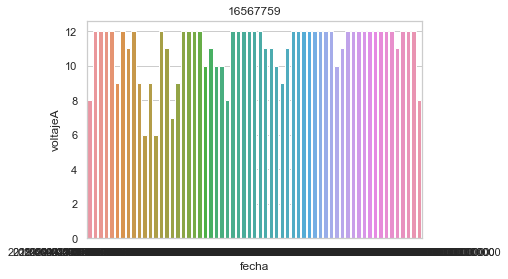

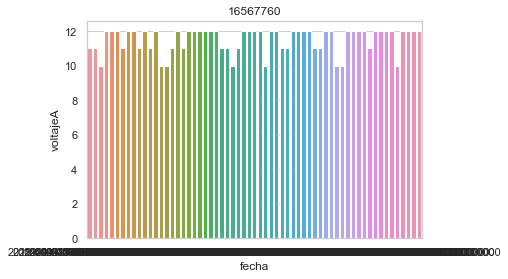

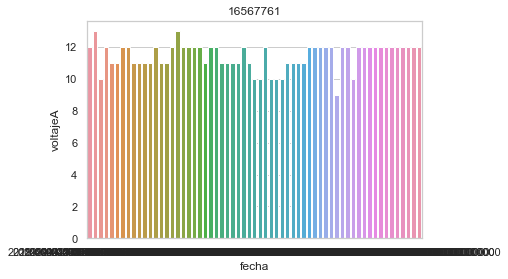

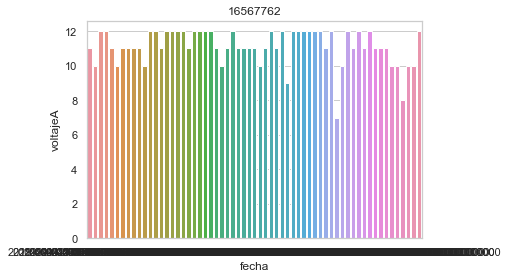

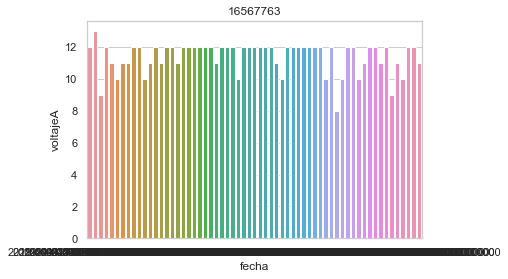

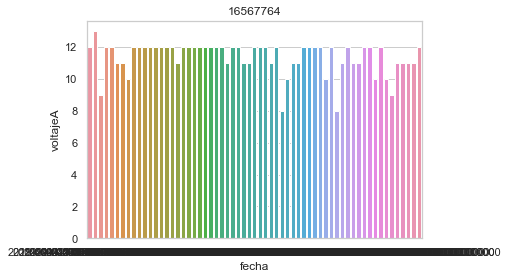

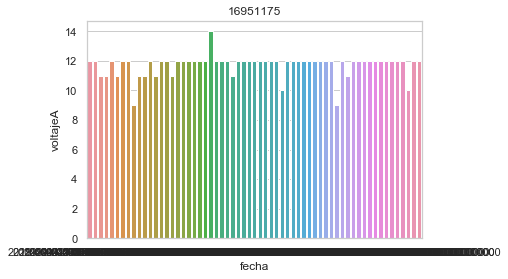

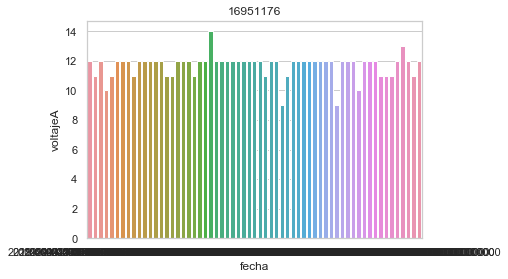

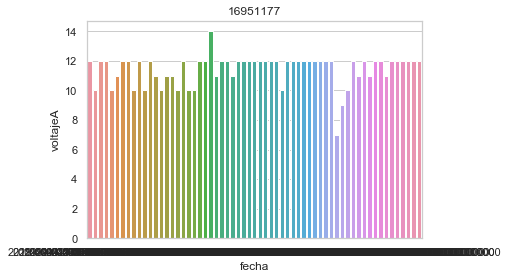

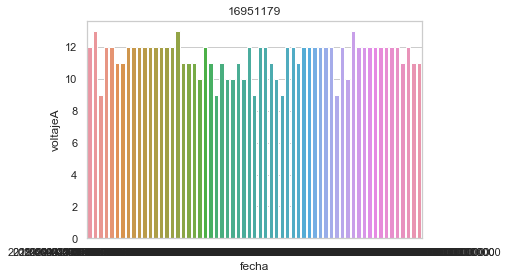

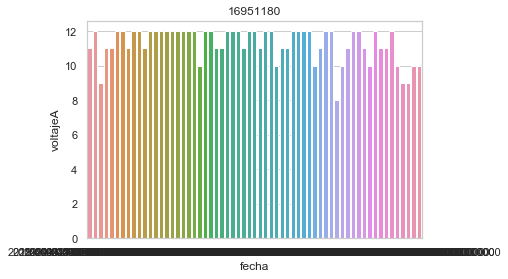

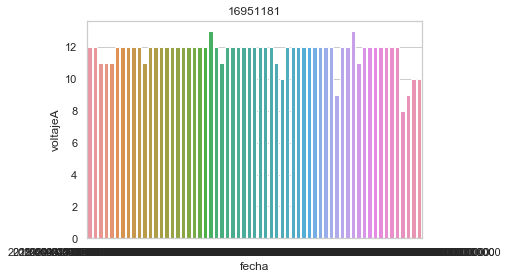

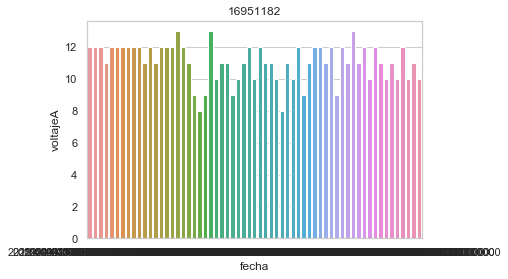

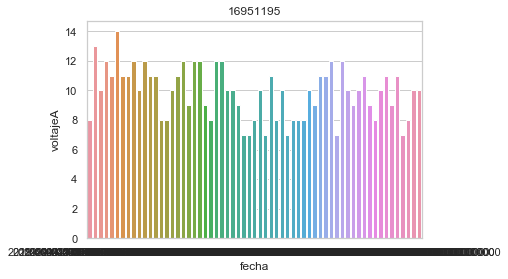

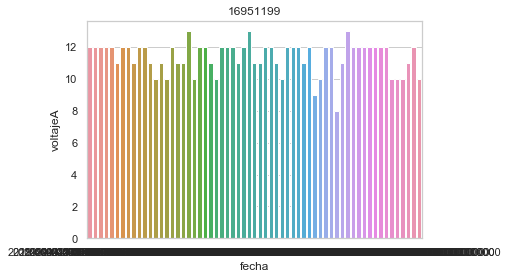

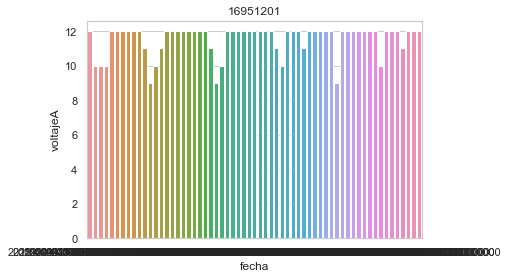

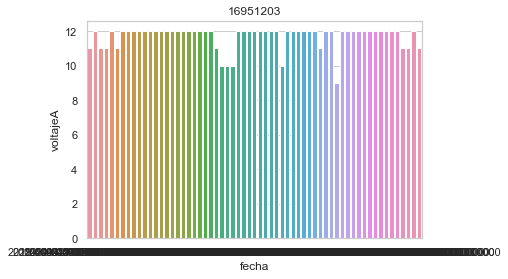

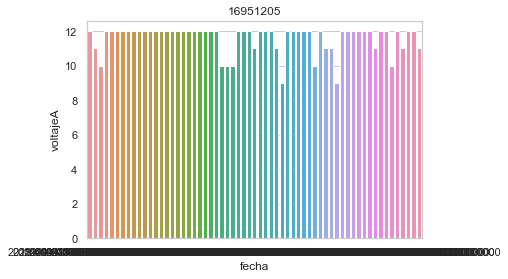

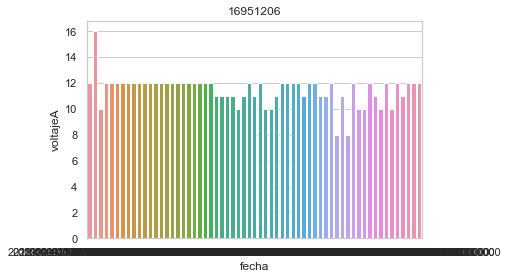

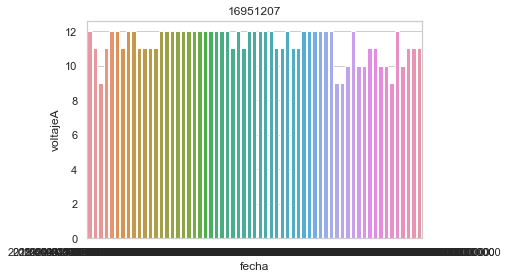

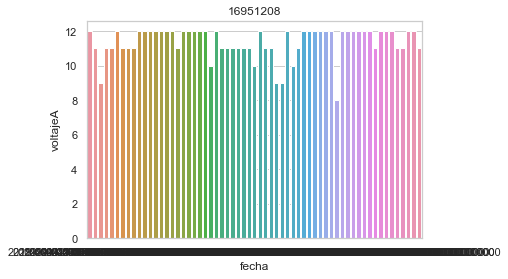

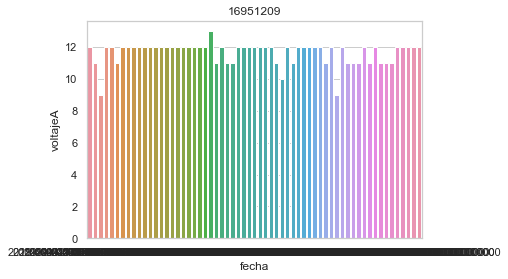

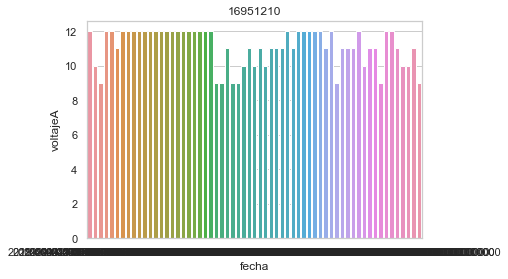

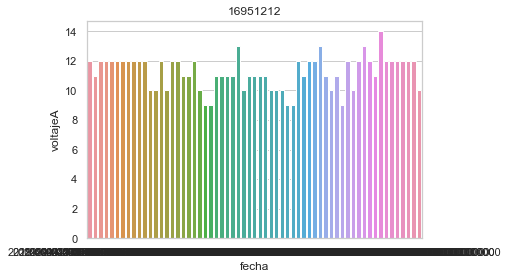

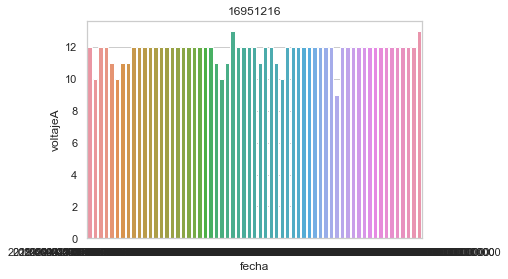

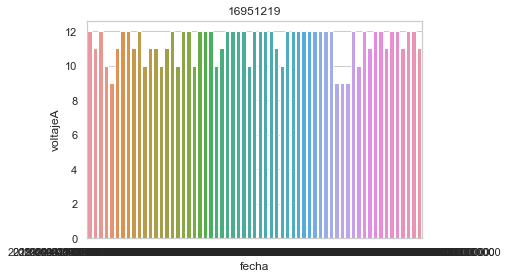

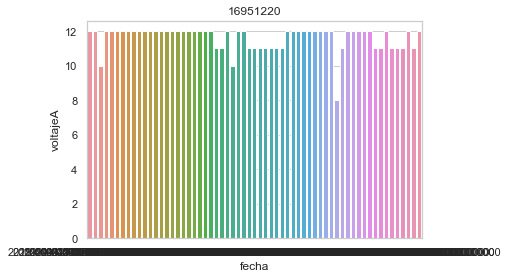

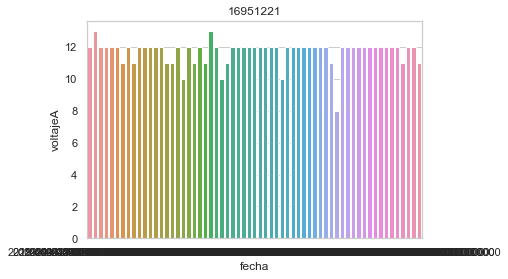

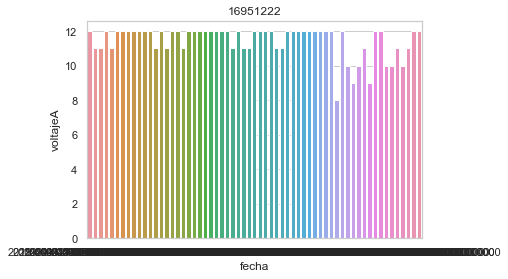

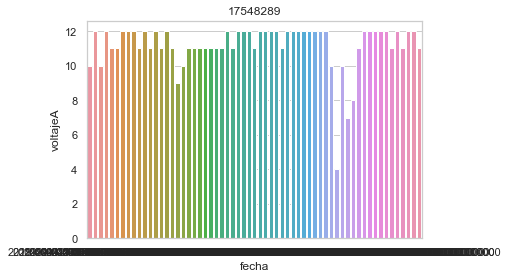

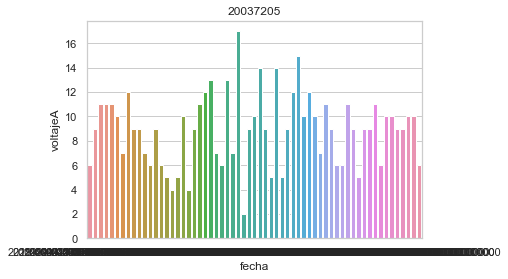

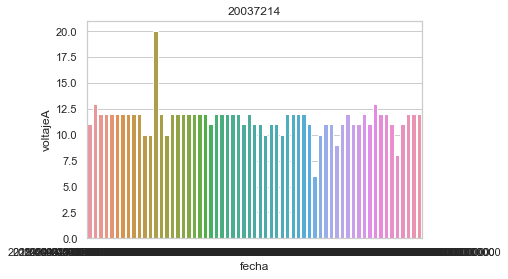

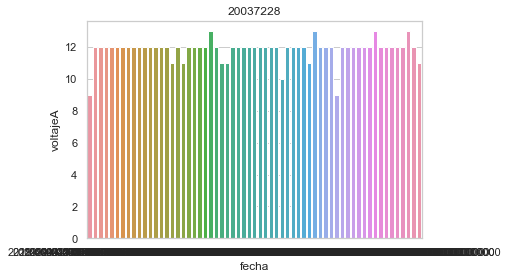

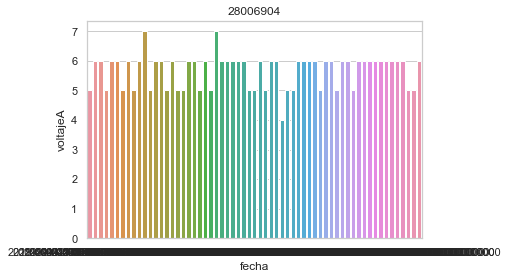

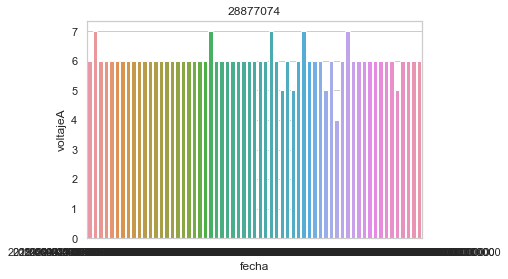

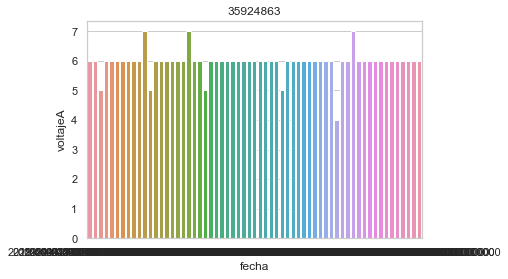

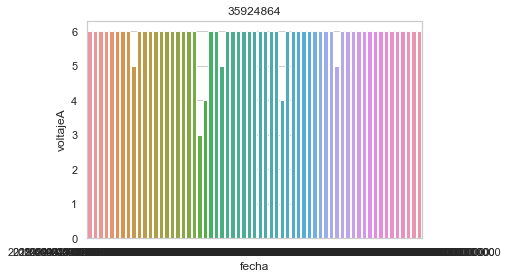

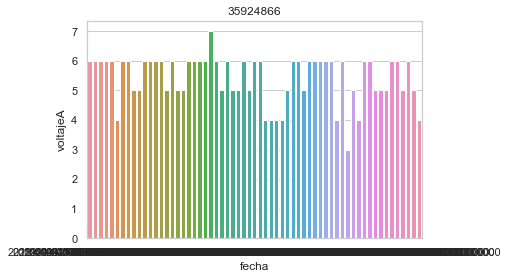

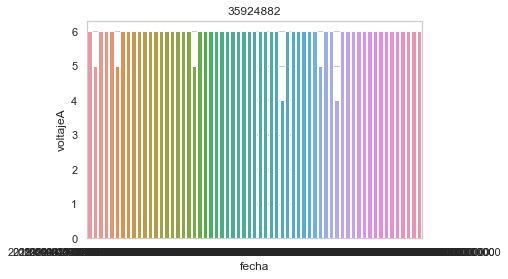

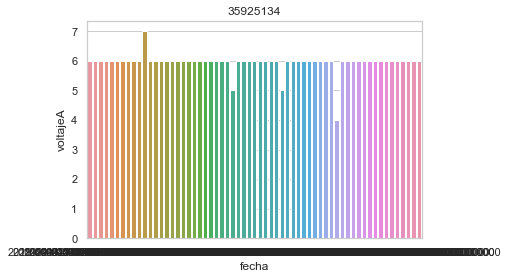

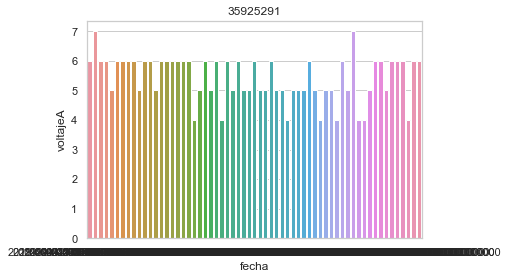

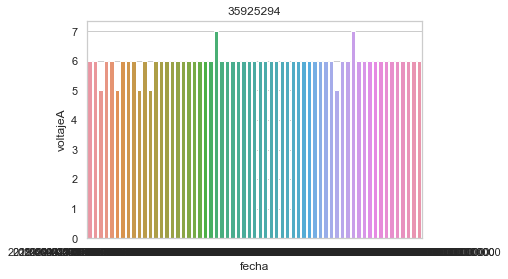

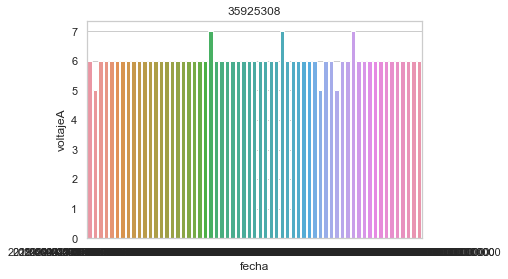

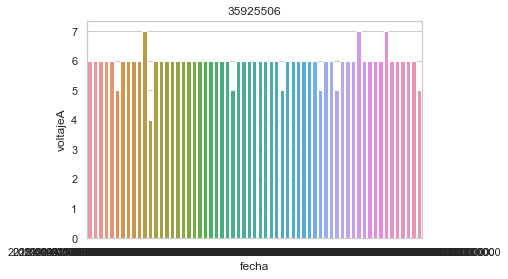

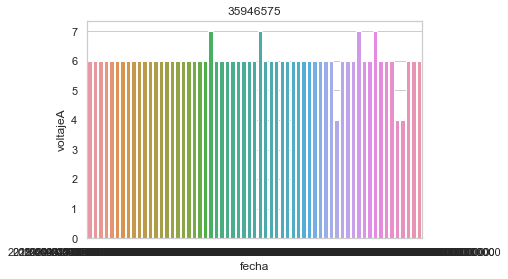

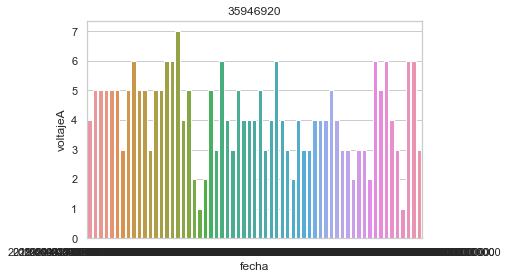

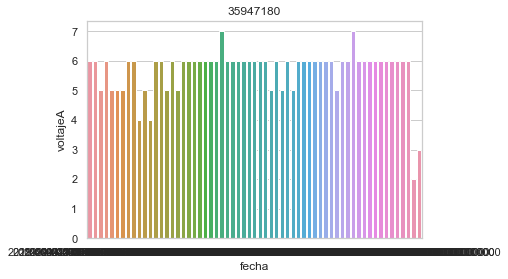

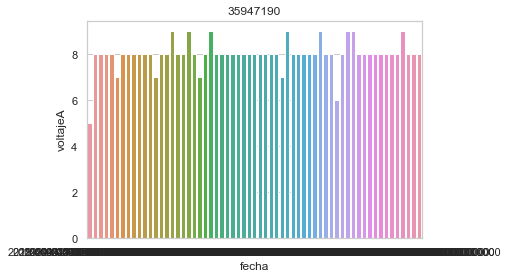

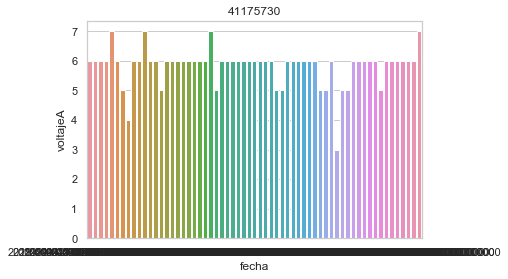

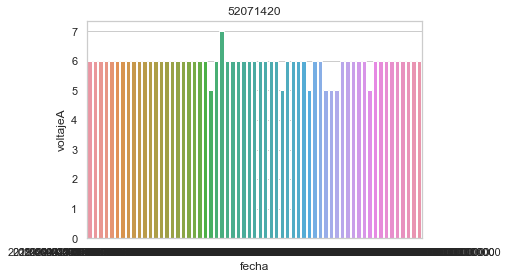

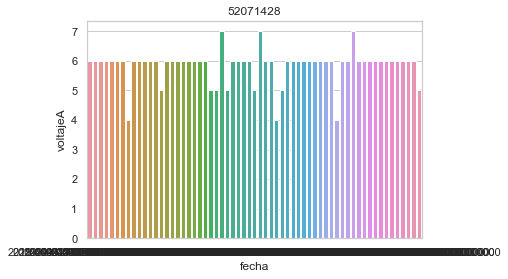

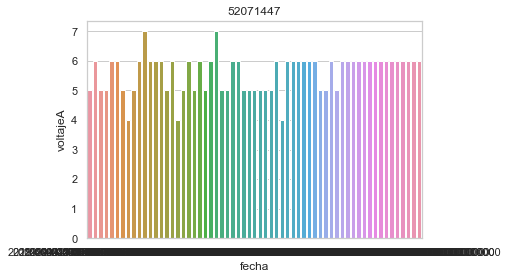

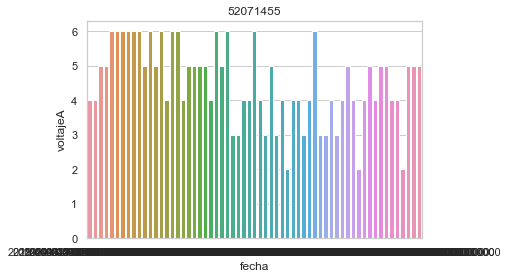

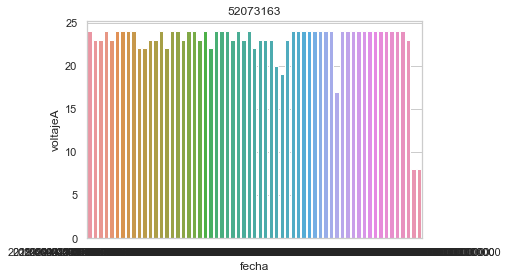

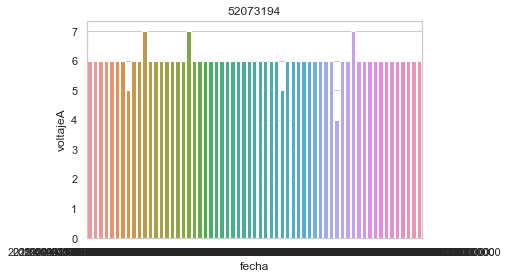

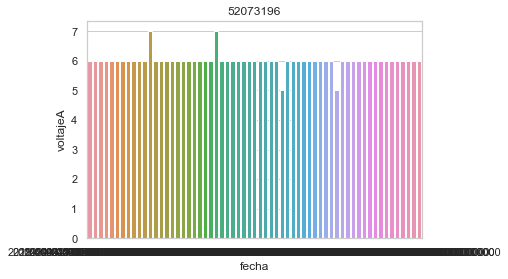

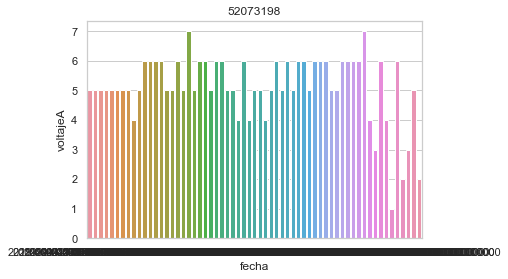

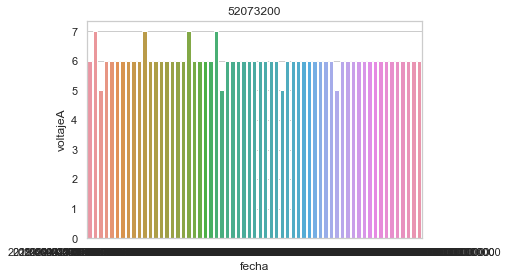

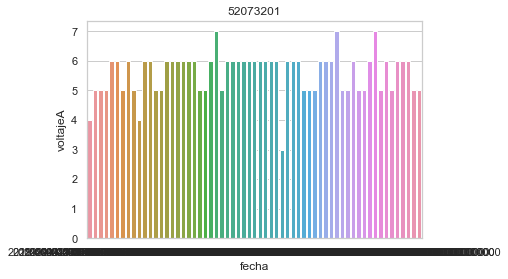

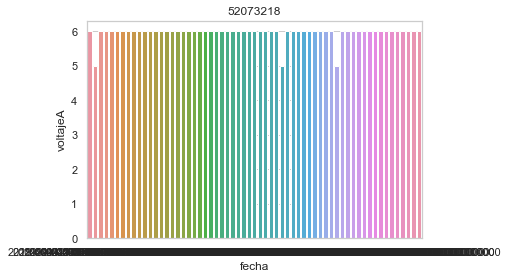

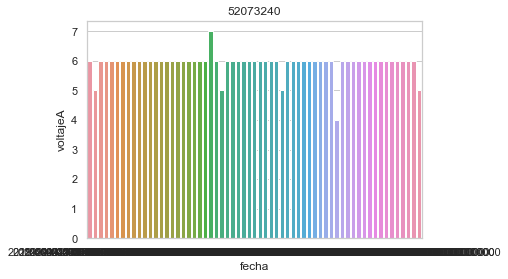

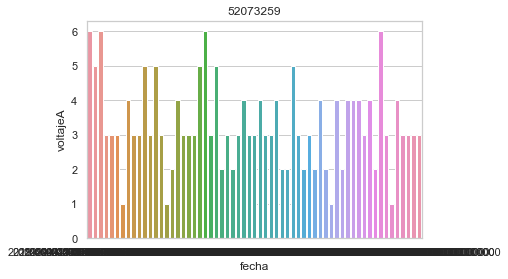

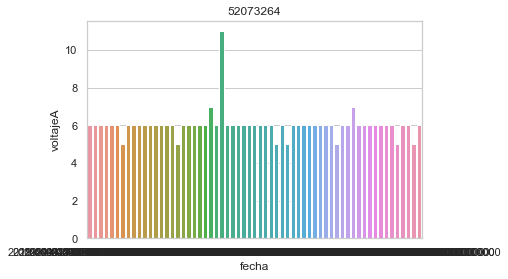

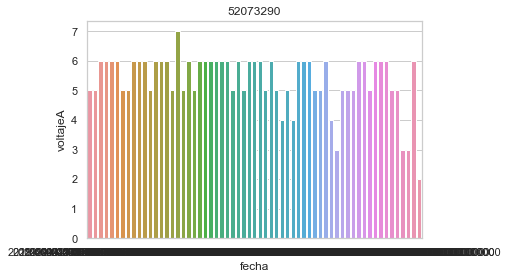

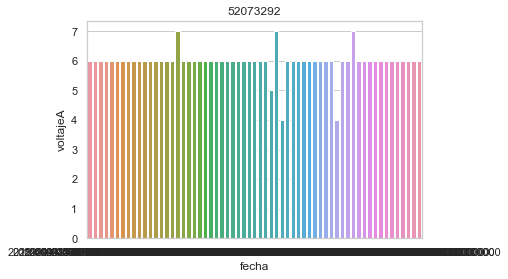

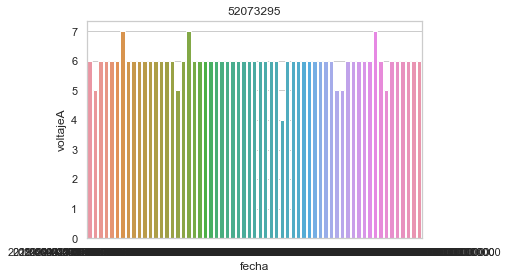

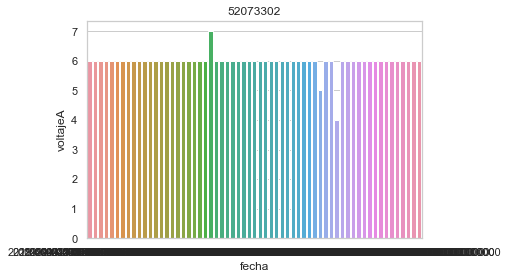

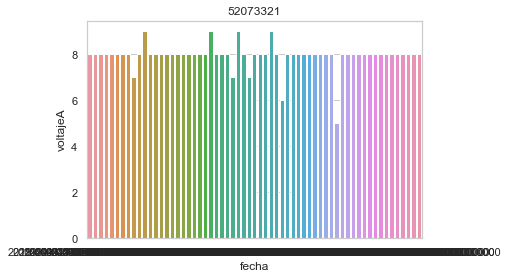

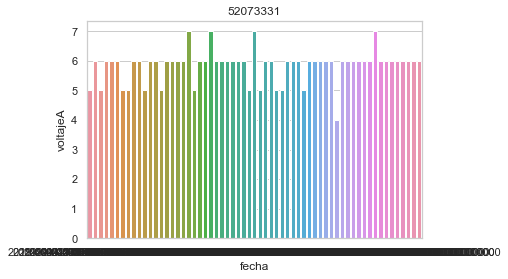

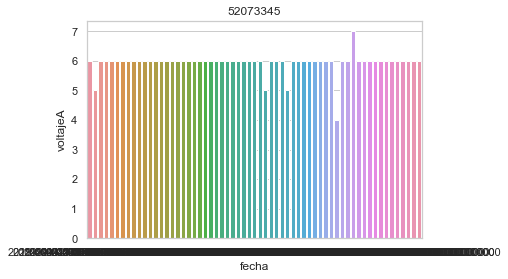

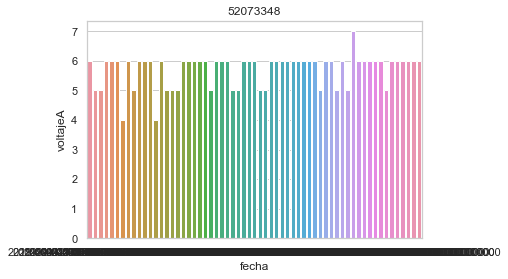

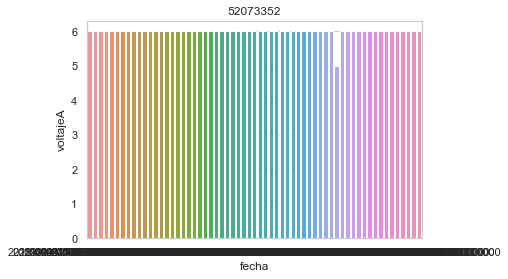

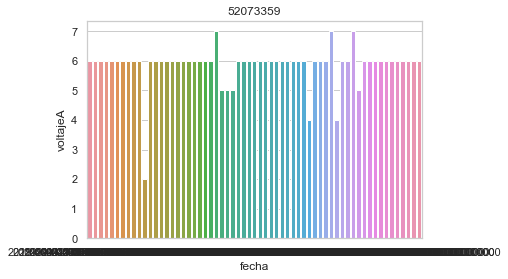

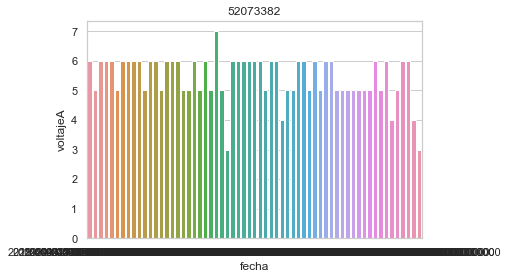

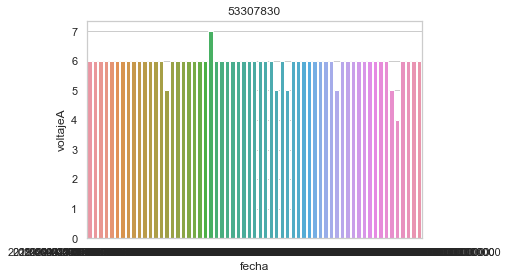

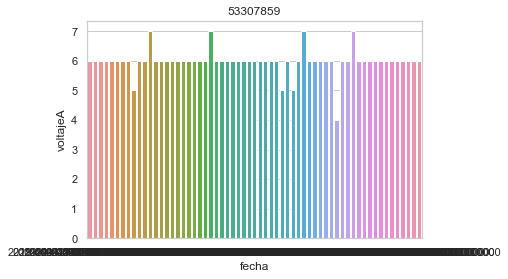

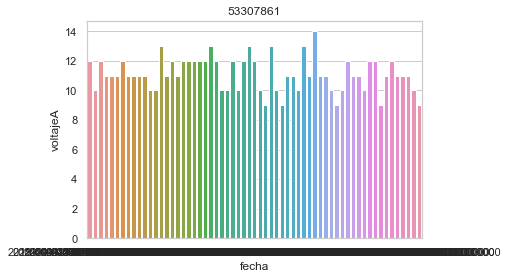

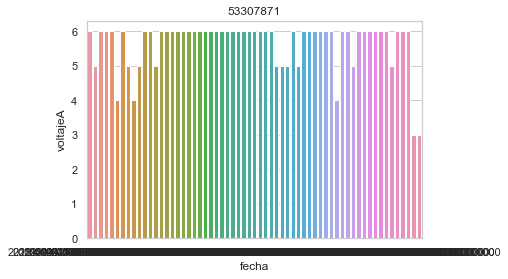

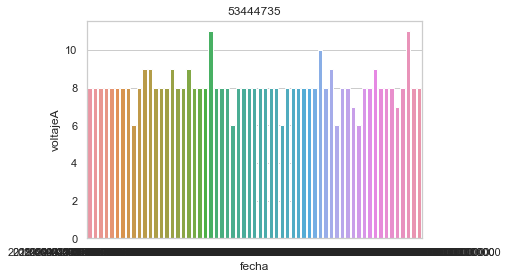

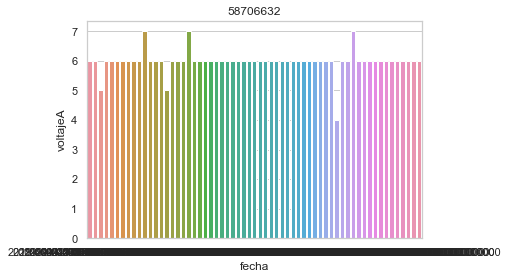

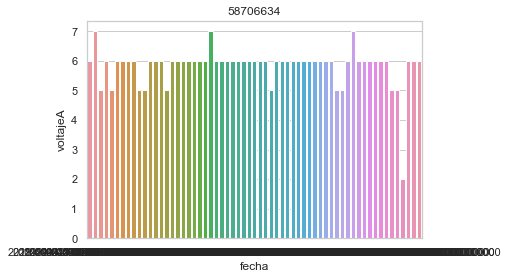

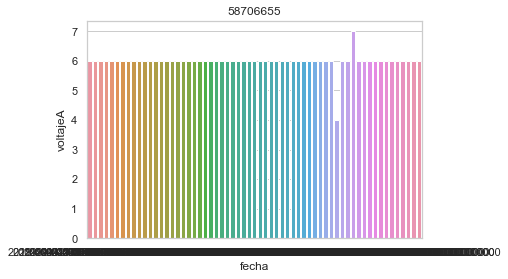

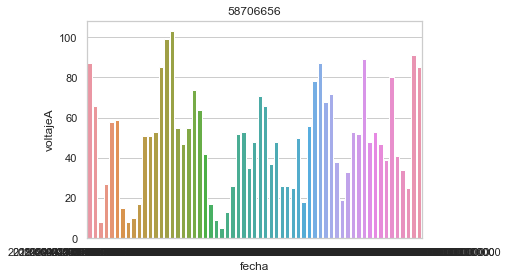

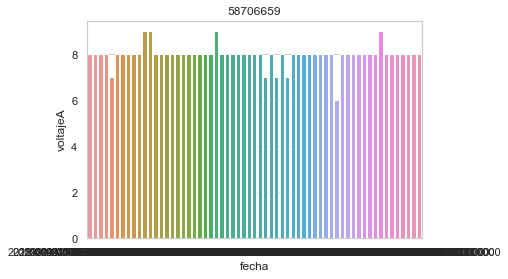

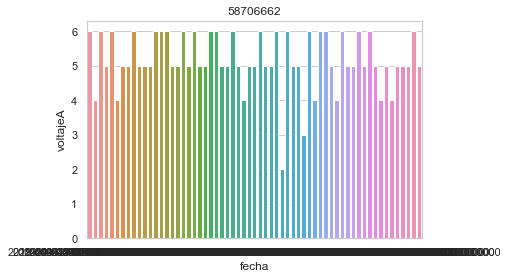

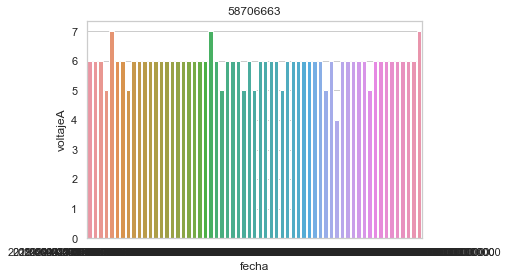

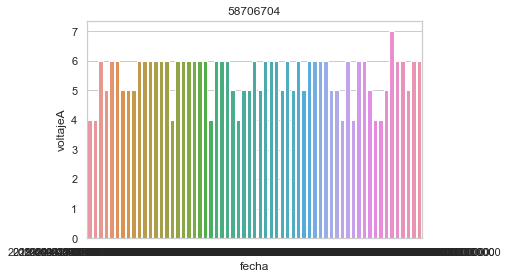

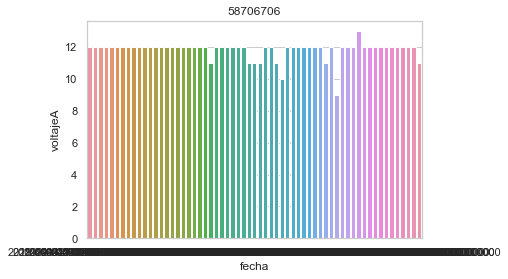

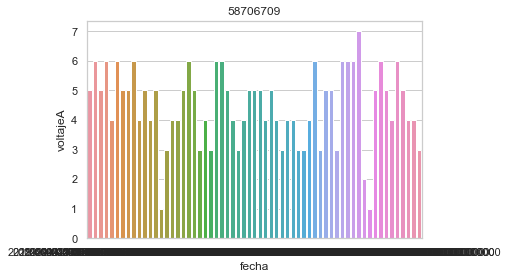

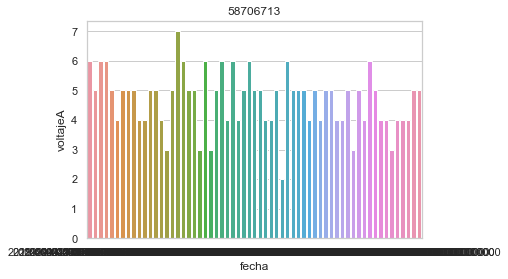

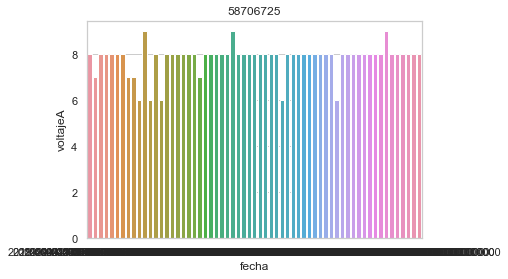

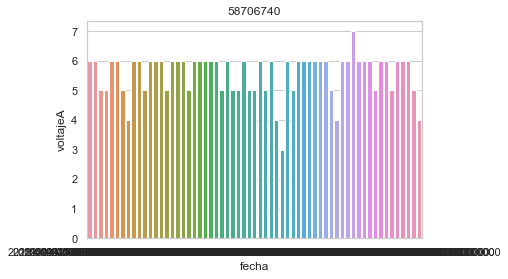

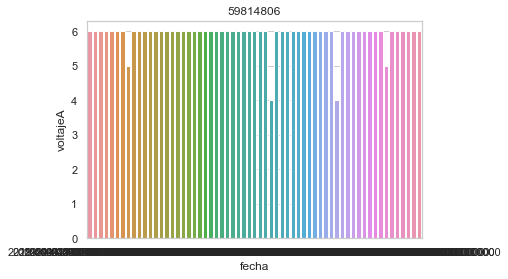

In [29]:
with PdfPages("cada_dia_pints_widows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        sns.barplot(x = g.index, y = "voltajeA", data =g)
        pdf.savefig(figure)

    

In [9]:
var_d = {}
std_d = {}
for n, g in df.groupby("medidor"):
    #g["fecha"] = pd.to_datetime(g["fecha"])
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    variance = g["voltajeA"].var()
    std = g["voltajeA"].std()
    var_d[n] = variance
    std_d[n] = std

    

In [32]:
s1 = pd.Series(var_d)
s2 = pd.Series(std_d)

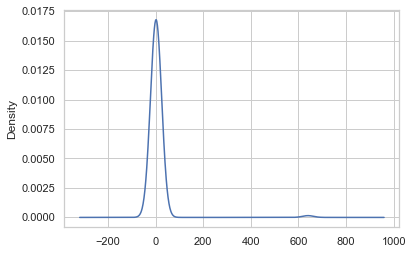

In [37]:
fig = plt.figure()
s1.plot.kde()
plt.savefig("Densidad_var_numero_dias.jpg")

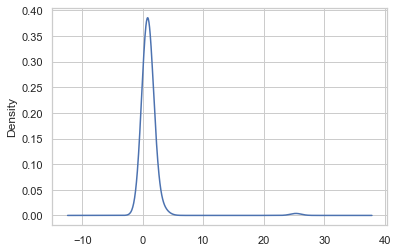

In [36]:
fig = plt.figure()
s2.plot.kde()
plt.savefig("Densidad_std_numero_dias.jpg")